In [1]:


# Importing necessary libraries

from IPython.display import display, HTML
import requests
from bs4 import BeautifulSoup
from collections import defaultdict


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import string

# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.decomposition import LatentDirichletAllocation


import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

In [2]:
# Step 1: Fetch the Wikipedia page content
url = "https://en.wikipedia.org/wiki/List_of_mental_disorders"
response = requests.get(url)

In [3]:
# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of mental disorders - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited

In [4]:
print(type(soup.contents)) 
soup.content

<class 'list'>


In [5]:
soup.body

<body class="skin--responsive skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-List_of_mental_disorders rootpage-List_of_mental_disorders skin-vector-2022 action-view"><a class="mw-jump-link" href="#bodyContent">Jump to content</a>
<div class="vector-header-container">
<header class="vector-header mw-header">
<div class="vector-header-start">
<nav aria-label="Site" class="vector-main-menu-landmark">
<div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">
<input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
<label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-m

In [6]:
body = soup.body
list(body.children)

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 '\n',
 <div class="vector-header-container">
 <header class="vector-header mw-header">
 <div class="vector-header-start">
 <nav aria-label="Site" class="vector-main-menu-landmark">
 <div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">
 <input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
 <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-main-menu-dropdown-checkbox" id="vector-main-menu-dropdown-label"><span class="vector-icon mw-ui-icon-menu mw-ui-icon-wikimedia-menu"></span>
 <span class="vector-dropdown-label-text">Main menu</span>
 </label>
 <div

In [7]:
for child in body.children:
    print(child)

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>


<div class="vector-header-container">
<header class="vector-header mw-header">
<div class="vector-header-start">
<nav aria-label="Site" class="vector-main-menu-landmark">
<div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">
<input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
<label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-main-menu-dropdown-checkbox" id="vector-main-menu-dropdown-label"><span class="vector-icon mw-ui-icon-menu mw-ui-icon-wikimedia-menu"></span>
<span class="vector-dropdown-label-text">Main menu</span>
</label>
<div class="vector-dr

In [8]:
# Extracting data
data = []
divs = soup.find_all('div', class_='mw-heading mw-heading2')

for div in divs:
    category = div.find('h2')['id']
    ul = div.find_next('ul')
    if ul:
        for li in ul.find_all('li'):
            a_tag = li.find('a')
            if a_tag:
                url = a_tag['href']
                disorder = a_tag['title']
                data.append([category, disorder, url])

# Display the data
import pandas as pd
df = pd.DataFrame(data, columns=['Category', 'Disorder', 'URL'])
print(df)

              Category                                       Disorder  \
0    Anxiety_disorders                                    Agoraphobia   
1    Anxiety_disorders                   Generalized anxiety disorder   
2    Anxiety_disorders                                 Panic disorder   
3    Anxiety_disorders                               Selective mutism   
4    Anxiety_disorders                    Separation anxiety disorder   
..                 ...                                            ...   
157           See_also  List of neurological conditions and disorders   
158           See_also       International Classification of Diseases   
159         References                            Template:Psychiatry   
160         References                       Template talk:Psychiatry   
161         References           Special:EditPage/Template:Psychiatry   

                                                   URL  
0                                    /wiki/Agoraphobia  
1        

In [9]:
# Add prefix to the URL column
df['URL'] = "https://en.wikipedia.org" + df['URL']

# Remove rows where Category is 'References'
df = df[df['Category'] != 'References']

df = df[df['Category'] != 'See_also']

In [10]:
print(df)

                  Category                          Disorder  \
0        Anxiety_disorders                       Agoraphobia   
1        Anxiety_disorders      Generalized anxiety disorder   
2        Anxiety_disorders                    Panic disorder   
3        Anxiety_disorders                  Selective mutism   
4        Anxiety_disorders       Separation anxiety disorder   
..                     ...                               ...   
152  Personality_disorders     Schizoid personality disorder   
153  Personality_disorders  Schizotypal personality disorder   
154                  Other                  Gender dysphoria   
155                  Other                         Catatonia   
156                  Other            Culture-bound syndrome   

                                                   URL  
0            https://en.wikipedia.org/wiki/Agoraphobia  
1    https://en.wikipedia.org/wiki/Generalized_anxi...  
2         https://en.wikipedia.org/wiki/Panic_disorder  
3  

In [11]:
df['Disorder'].unique()


array(['Agoraphobia', 'Generalized anxiety disorder', 'Panic disorder',
       'Selective mutism', 'Separation anxiety disorder',
       'Specific phobias', 'Social anxiety disorder',
       'Dissociative identity disorder', 'Psychogenic amnesia',
       'Depersonalization-derealization disorder', 'Dissociative amnesia',
       'Psychogenic non-epileptic seizure',
       'Other specified dissociative disorder',
       'Unspecified dissociative disorder', 'Ganser syndrome',
       'Disruptive mood dysregulation disorder',
       'Major depressive disorder', 'Dysthymia',
       'Premenstrual dysphoric disorder', 'Psychotic depression',
       'Seasonal affective disorder', 'Atypical depression',
       'Catatonic depression', 'Postpartum depression',
       'Melancholic depression', 'Pervasive refusal syndrome',
       'Unspecified depressive disorder', 'Reactive attachment disorder',
       'Disinhibited social engagement disorder',
       'Post-traumatic stress disorder',
       'Post-

In [12]:


def extract_initial_paragraphs(url):
    try:
        # Fetch the webpage content
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Helper function to clean and format text
        def clean_text(text):
            # Remove extra spaces and ensure proper spacing between words
            return ' '.join(text.split())

        # Check for infobox
        table = soup.find('table', class_='infobox ib-medical-condition')
        if table:
            # Handle infobox case
            paragraphs = []
            current_element = table.find_next_sibling()
            while current_element:
                if current_element.name == 'meta' and current_element.get('property') == 'mw:PageProp/toc':
                    break
                if current_element.name == 'p':  # Collect paragraphs
                    text = current_element.get_text(separator=" ", strip=True)  # Use separator to preserve proper spacing
                    if text:  # Avoid empty paragraphs
                        paragraphs.append(clean_text(text))
                current_element = current_element.find_next_sibling()

            return " ".join(paragraphs) if paragraphs else "No description found"
        else:
            # Handle no infobox case
            meta_tag = soup.find('meta', property='mw:PageProp/toc')
            if not meta_tag:
                return "No meta tag found"

            # Collect paragraphs above the meta tag
            paragraphs = []
            current_element = meta_tag.find_previous_sibling()
            while current_element:
                if current_element.name == 'p':  # Collect paragraphs
                    text = current_element.get_text(separator=" ", strip=True)  # Use separator to preserve proper spacing
                    if text:  # Avoid empty paragraphs
                        paragraphs.insert(0, clean_text(text))  # Insert at the start to maintain order
                current_element = current_element.find_previous_sibling()

            return " ".join(paragraphs) if paragraphs else "No description found"

    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        return "Error fetching data"

# Apply the logic only to URLs without an infobox
def apply_extraction_conditionally(row):
    # If infobox exists, use the existing 'infobox' logic; otherwise, use 'no infobox' logic
    description = extract_initial_paragraphs(row['URL'])
    return description

# Apply function conditionally to the DataFrame
df['Description'] = df.apply(apply_extraction_conditionally, axis=1)
df


Category                          Disorder  \
0        Anxiety_disorders                       Agoraphobia   
1        Anxiety_disorders      Generalized anxiety disorder   
2        Anxiety_disorders                    Panic disorder   
3        Anxiety_disorders                  Selective mutism   
4        Anxiety_disorders       Separation anxiety disorder   
..                     ...                               ...   
152  Personality_disorders     Schizoid personality disorder   
153  Personality_disorders  Schizotypal personality disorder   
154                  Other                  Gender dysphoria   
155                  Other                         Catatonia   
156                  Other            Culture-bound syndrome   

                                                   URL  \
0            https://en.wikipedia.org/wiki/Agoraphobia   
1    https://en.wikipedia.org/wiki/Generalized_anxi...   
2         https://en.wikipedia.org/wiki/Panic_disorder   
3       https://en.wikipedia.org/wiki/Selective_mutism   
4    https://en.wikipedia.org/wiki/Separation_anxie...   
..                                                 ...   
152  https://en.wikipedia.org/wiki/Schizoid_persona...   
153  https://en.wikipedia.org/wiki/Schizotypal_pers...   
154     https://en.wikipedia.org/wiki/Gender_dysphoria   
155            https://en.wikipedia.org/wiki/Catatonia   
156  https://en.wikipedia.org/wiki/Culture-bound_sy...   

                                           Description  
0    Agoraphobia [ 1 ] is a mental and behavioral d...  
1    Generalized anxiety disorder ( GAD ) is a ment...  
2    Panic disorder is a mental and behavioral diso...  
3    Selective mutism ( SM ) is an anxiety disorder...  
4    Separation anxiety disorder ( SAD ) is an anxi...  
..                                                 ...  
152  Schizoid personality disorder ( / ˈ s k ɪ t s ...  
153  Schizotypal personality disorder ( StPD or SPD...  
154  Gender dysphoria ( GD ) is the distress a pers...  
155  Catatonia is a complex syndrome, most commonly...  
156  In medicine and medical anthropology , a cultu...  

[157 rows x 4 columns]

In [13]:
# Display the description for the disorder 'Agoraphobia'
print(df[df['Disorder'] == 'Gender dysphoria']['Description'].values[0])


Gender dysphoria ( GD ) is the distress a person experiences due to a mismatch between their gender identity —their personal sense of their own gender —and their sex assigned at birth . [ 5 ] [ 6 ] The term replaced the previous diagnostic label of gender identity disorder ( GID ) in 2013 with the release of the diagnostic manual DSM-5 . The condition was renamed to remove the stigma associated with the term disorder . [ 7 ] The International Classification of Diseases uses the term gender incongruence instead of gender dysphoria , defined as a marked and persistent mismatch between gender identity and assigned gender, regardless of distress or impairment. People with gender dysphoria commonly identify as transgender . [ 8 ] Gender nonconformity is not the same thing as gender dysphoria [ 9 ] and does not always lead to dysphoria or distress. [ 10 ] The causes of gender incongruence are unknown but a gender identity likely reflects genetic, biological, environmental, and cultural facto

In [14]:
# Save or display the updated DataFrame
df.to_csv('output_with_descriptions.csv', index=False)
print(df[['Category', 'Disorder', 'Description']])


                  Category                          Disorder  \
0        Anxiety_disorders                       Agoraphobia   
1        Anxiety_disorders      Generalized anxiety disorder   
2        Anxiety_disorders                    Panic disorder   
3        Anxiety_disorders                  Selective mutism   
4        Anxiety_disorders       Separation anxiety disorder   
..                     ...                               ...   
152  Personality_disorders     Schizoid personality disorder   
153  Personality_disorders  Schizotypal personality disorder   
154                  Other                  Gender dysphoria   
155                  Other                         Catatonia   
156                  Other            Culture-bound syndrome   

                                           Description  
0    Agoraphobia [ 1 ] is a mental and behavioral d...  
1    Generalized anxiety disorder ( GAD ) is a ment...  
2    Panic disorder is a mental and behavioral diso...  
3  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     157 non-null    object
 1   Disorder     157 non-null    object
 2   URL          157 non-null    object
 3   Description  157 non-null    object
dtypes: object(4)
memory usage: 6.1+ KB


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict

# Keywords for each category
CATEGORY_KEYWORDS = {
    "Symptoms": [
    "symptom", "symptoms", "clinical symptom", "clinical symptoms",
    "sign", "signs", "clinical sign", "clinical signs",
    "manifestation", "manifestations", "clinical manifestation", "clinical manifestations",
    "characteristic", "characteristics", "clinical characteristic", "clinical characteristics",
    "indication", "indications", "clinical indication", "clinical indications",
    "presentation", "presentations", "clinical presentation", "clinical presentations",
    "features", "feature", "clinical feature", "clinical features",
    "observable signs", "observable symptoms", "observable features",
    "observable manifestation", "observable manifestations", 
    "early signs", "early symptoms", "early manifestations",
    "common symptoms", "common symptom", "frequent symptoms", "frequent symptom",
    "distinctive signs", "distinctive symptoms", "distinctive characteristics",
    "behavioral symptoms", "behavioral symptom", "psychological symptoms", "psychological symptom",
    "physical symptoms", "physical symptom", "somatic symptoms", "somatic symptom",
    "emotional symptoms", "emotional symptom", "cognitive symptoms", "cognitive symptom",
    "mental symptoms", "mental symptom", "neurological symptoms", "neurological symptom",
    "psychiatric symptoms", "psychiatric symptom", "bodily symptoms", "bodily symptom",
    "observable changes", "changes in behavior", "changes in mood",
    "changes in thought processes", "changes in physical health",
    "pathognomonic symptoms", "pathognomonic sign", "defining symptom", "defining symptoms",
    "clinical markers", "marker symptoms", "key features", "key symptoms",
    "red flag symptoms", "warning signs", "diagnostic signs", "diagnostic features",
    "diagnostic markers", "hallmark symptoms", "hallmark sign",
    "associated symptoms", "accompanying symptoms", "secondary symptoms",
    "core symptoms", "core symptom", "primary symptoms", "primary symptom",
    "secondary signs", "secondary manifestations", "additional symptoms",
    "overlapping symptoms", "symptom overlap", "overlap in symptoms",
    "mild symptoms", "moderate symptoms", "severe symptoms", "acute symptoms", "chronic symptoms",
    "episodic symptoms", "persistent symptoms", "progressive symptoms",
    "recurrent symptoms", "sporadic symptoms", "variable symptoms",
    "symptom clusters", "symptom cluster", "clustered symptoms",
    "atypical symptoms", "unusual symptoms", "rare symptoms",
    "nonspecific symptoms", "general symptoms", "specific symptoms",
    "localized symptoms", "systemic symptoms", "regional symptoms",
    "fluctuating symptoms", "worsening symptoms", "improving symptoms",
    "onset of symptoms", "symptom onset", "initial symptoms",
    "symptom progression", "progression of symptoms", "symptom resolution",
    "remission of symptoms", "resolution of symptoms",
    "symptom exacerbation", "exacerbated symptoms", "symptom triggers",
    "triggering symptoms", "triggered symptoms", "provoked symptoms",
    "underlying symptoms", "hidden symptoms", "latent symptoms",
    "observable traits", "observable phenomena", "visible symptoms",
    "symptomatology", "clinical symptomatology", "diagnostic symptomatology",
    "signs and symptoms", "presentation of symptoms", "presentation of signs",
    "behavioral patterns", "symptomatic patterns", "clinical patterns",
    "early warning signs", "early indications", "early manifestations",
    "observable behavior", "behavioral cues", "physical cues",
    "mental health symptoms", "psychological distress signs",
    "emotional distress signs", "emotional indicators", "cognitive impairment symptoms",
    "motor symptoms", "sensory symptoms", "autonomic symptoms",
    "pain-related symptoms", "symptoms of anxiety", "symptoms of depression",
    "mood symptoms", "sleep-related symptoms", "symptoms of fatigue",
    "functional symptoms", "disruptive symptoms", "disabling symptoms",
    "symptom management", "recognizing symptoms", "identifying symptoms"
],
    "Causes": [
    "cause", "causes", "causation", "causative factors",
    "etiology", "etiologies", "etiological factors", "underlying etiology",
    "reason", "reasons", "underlying reason", "underlying reasons",
    "trigger", "triggers", "triggering factors", "underlying triggers",
    "risk factor", "risk factors", "contributing factors",
    "contributor", "contributors", "contributory causes", "contributory factors",
    "origin", "origins", "underlying origin", "underlying origins",
    "source", "sources", "underlying source", "underlying sources",
    "mechanism", "mechanisms", "underlying mechanism", "underlying mechanisms",
    "pathogenesis", "pathogenic factors", "pathological factors",
    "determinant", "determinants", "key determinant", "key determinants",
    "precipitating factors", "precipitating causes", "instigating factors",
    "root cause", "root causes", "primary cause", "primary causes",
    "secondary cause", "secondary causes", "indirect causes",
    "direct cause", "direct causes", "leading cause", "leading causes",
    "driving factor", "driving factors", "driving cause", "driving causes",
    "associated cause", "associated causes", "concurrent causes",
    "predisposing factors", "predisposing cause", "predisposing conditions",
    "environmental factors", "genetic factors", "biological factors",
    "physiological factors", "psychological factors", "behavioral factors",
    "sociocultural factors", "external causes", "internal causes",
    "inherited factors", "hereditary factors", "family history",
    "lifestyle factors", "lifestyle causes", "dietary factors",
    "hormonal causes", "metabolic causes", "chemical causes",
    "structural causes", "developmental causes", "functional causes",
    "neurological causes", "immune causes", "autoimmune causes",
    "infection-related causes", "trauma-related causes", "injury-related causes",
    "exposure-related causes", "exposure to toxins", "toxic causes",
    "substance-related causes", "drug-related causes", "medication-related causes",
    "stress-related causes", "stress factors", "stress-induced factors",
    "age-related causes", "age-related factors", "demographic factors",
    "occupational factors", "professional risks", "workplace factors",
    "environmental triggers", "climatic factors", "geographical factors",
    "acute causes", "chronic causes", "recurrent causes",
    "congenital causes", "acquired causes", "idiopathic causes",
    "unknown causes", "unidentified causes", "potential causes",
    "hypothetical causes", "theoretical causes", "possible causes",
    "suspected causes", "proposed causes", "emerging causes",
    "interaction of factors", "multifactorial causes", "complex causes",
    "explanatory factors", "explanatory mechanisms", "causal mechanisms",
    "causal pathways", "causal explanations", "causal associations",
    "correlation with causes", "causal relationships", "factors contributing to",
    "inducing factors", "provoking factors", "aggravating factors",
    "exacerbating factors", "underlying risks", "underlying determinants",
    "causes of disease", "causes of illness", "causes of symptoms",
    "etiology of disorders", "risk assessment", "cause identification",
    "factors leading to", "origin of condition", "reasons behind",
    "pathological pathways", "pathogenesis pathways", "causal links",
    "precursors to", "preceding factors", "historical factors",
    "developmental origins", "genetic predisposition", "environmental exposure",
    "causal evidence", "causal links to", "drivers of condition",
    "potential triggers", "major causes", "minor causes",
    "proximal causes", "distal causes", "external influences",
    "systemic causes", "contextual factors", "background causes",
    "immediate causes", "delayed causes", "underpinning causes",
    "causal contributors", "influencing factors", "contributory elements",
    "associated risks", "linked causes", "mitigating causes",
    "preventable causes", "avoidable causes", "inevitable causes",
    "natural causes", "artificial causes", "experimental causes",
    "factors of disease", "factors of disorder", "factors of symptoms",
    "causative agent", "causative agents", "agents of cause",
    "external determinants", "internal determinants", "behavioral influences",
    "causal dynamics", "etiological mechanisms", "etiological dynamics",
    "etiological explanations", "etiological pathways", "source of condition",
    "initiating factors", "causal effects", "contributory risks"
],
    "Treatment": [
    "treatment", "treatments", "management", "therapies", "therapy", 
    "intervention", "interventions", "care", "healthcare",
    "medical treatment", "clinical treatment", "therapeutic approach",
    "therapeutic strategies", "therapeutic measures", "treatment options",
    "treatment strategies", "treatment plans", "treatment protocols",
    "treatment methods", "treatment techniques", "treatment guidelines",
    "remedy", "remedies", "curative measures", "healing methods",
    "medication", "medications", "pharmacological treatment",
    "drug therapy", "pharmaceuticals", "drug-based treatments",
    "psychotherapy", "psychotherapies", "talk therapy", 
    "behavioral therapy", "cognitive therapy", "CBT",
    "behavioral interventions", "counseling", "mental health therapy",
    "alternative treatments", "alternative therapies", "natural remedies",
    "non-pharmacological treatments", "integrative therapy",
    "holistic treatment", "holistic approaches", "complementary therapies",
    "lifestyle changes", "lifestyle modifications", "supportive care",
    "rehabilitation", "rehab", "rehabilitation therapy",
    "post-treatment care", "follow-up care", "maintenance therapy",
    "self-care", "self-treatment", "self-management",
    "acute treatment", "chronic treatment", "ongoing treatment",
    "preventive measures", "preventive treatment", "prophylactic treatment",
    "relapse prevention", "remission management", "symptom relief",
    "symptom management", "pain management", "discomfort relief",
    "palliative care", "end-of-life care", "supportive therapy",
    "clinical interventions", "clinical strategies", "clinical care",
    "evidence-based treatments", "standard treatment", "standard care",
    "recommended treatment", "first-line treatment", "first-line therapy",
    "second-line treatment", "adjuvant therapy", "combination therapy",
    "multi-modal therapy", "coordinated care", "comprehensive care",
    "advanced treatment", "specialized care", "focused treatment",
    "targeted therapy", "precision therapy", "customized treatment",
    "personalized therapy", "tailored treatment", "individualized care",
    "minimally invasive treatment", "surgical treatment", "non-surgical treatment",
    "invasive treatment", "non-invasive treatment", "outpatient care",
    "inpatient care", "hospital-based treatment", "clinical trials",
    "experimental treatments", "novel therapies", "innovative treatments",
    "emerging therapies", "new treatments", "trial therapies",
    "research-based treatments", "cutting-edge treatment", "advanced therapies",
    "ongoing research", "future treatments", "experimental interventions",
    "pain therapy", "psychosocial therapy", "behavioral modification",
    "mind-body therapy", "cognitive behavioral therapy", "exposure therapy",
    "dialectical behavior therapy", "emotional regulation therapy",
    "medication-assisted treatment", "drug-based interventions",
    "biological treatment", "hormonal therapy", "hormonal treatment",
    "genetic therapy", "cell-based therapy", "immune therapy",
    "immunotherapy", "stem cell therapy", "antibiotic therapy",
    "antiviral treatment", "antifungal therapy", "antidepressant therapy",
    "antipsychotic treatment", "mood stabilizers", "anti-anxiety medications",
    "painkillers", "analgesics", "anti-inflammatory treatment",
    "dietary therapy", "diet-based treatments", "nutrition therapy",
    "exercise therapy", "physical therapy", "physiotherapy",
    "occupational therapy", "speech therapy", "motor therapy",
    "neurotherapy", "neurological treatments", "brain stimulation therapy",
    "electroconvulsive therapy", "transcranial magnetic stimulation",
    "light therapy", "phototherapy", "aromatherapy", "massage therapy",
    "acupuncture", "chiropractic care", "reflexology",
    "detoxification therapy", "detox", "withdrawal management",
    "substance use treatment", "addiction therapy", "relapse management",
    "alcohol treatment", "drug rehabilitation", "smoking cessation therapy",
    "stress management", "anxiety reduction therapy", "relaxation techniques",
    "breathing exercises", "meditation therapy", "mindfulness therapy",
    "coping mechanisms", "emotional support", "support groups",
    "peer support", "community-based care", "outreach programs",
    "crisis intervention", "emergency care", "urgent treatment",
    "lifesaving treatment", "stabilization therapy", "rescue therapy",
    "corrective treatment", "adjustment therapy", "ameliorative measures",
    "problem-focused treatment", "solution-oriented therapy",
    "adaptive therapy", "resilience-building therapy", "relief measures",
    "non-traditional therapies", "western medicine", "eastern medicine",
    "clinical practice", "treatment innovation", "health improvement"
],
    "Comorbidities": [
    "comorbidities", "comorbidity", "comorbid", "associated conditions", "associated condition",
    "association with conditions", "related disorders", "related disorder", "relation to disorders",
    "co-occurring disorders", "co-occurring disorder", "co-occurrence", "concurrent disorders",
    "concurrent disorder", "concurrence", "overlapping conditions", "overlapping condition", "overlap",
    "dual diagnosis", "dual diagnoses", "comorbid patterns", "comorbid pattern", "comorbidly",
    "comorbidity prevalence", "prevalence of comorbidities", "comorbidity clusters", "cluster of comorbidities",
    "clustered comorbidities", "coexisting disorders", "coexisting disorder", "coexistence",
    "linked disorders", "linked disorder", "linkage", "psychiatric comorbidities", "psychiatric comorbidity",
    "psychiatrically comorbid", "psychological comorbidities", "psychological comorbidity",
    "psychologically comorbid", "medical comorbidities", "medical comorbidity", "medically comorbid",
    "behavioral comorbidities", "behavioral comorbidity", "behaviorally comorbid", "functional comorbidities",
    "functional comorbidity", "functionally comorbid", "common comorbidities", "common comorbidity",
    "commonly comorbid", "diagnostic overlap", "overlap in diagnosis", "overlapping diagnoses",
    "concurrent symptoms", "symptom concurrence", "concurrently symptomatic", "comorbidity spectrum",
    "spectrum of comorbidities", "anxiety and depression", "anxiety-related disorders", "anxiety-related disorder",
    "depressive disorders", "depressive disorder", "depression-related", "obsessive-compulsive comorbidities",
    "obsessive-compulsive comorbidity", "substance use comorbidities", "substance use comorbidity",
    "substance-related comorbid", "eating disorder comorbidities", "eating disorder comorbidity",
    "comorbid with eating disorders", "bipolar disorder comorbidities", "bipolar disorder comorbidity",
    "trauma-related comorbidities", "trauma-related comorbidity", "personality disorder comorbidities",
    "personality disorder comorbidity", "neurodevelopmental comorbidities", "neurodevelopmental comorbidity",
    "risk factors for comorbidity", "risk factors", "risk of comorbidities", "overlap in symptoms",
    "symptom overlap", "overlapping symptoms", "triggers for comorbidities", "triggers", "triggered comorbidly",
    "underlying conditions", "underlying condition", "trauma-induced comorbidities", "trauma-induced comorbidity",
    "developmental comorbidities", "developmental comorbidity", "genetic comorbidities", "genetic comorbidity",
    "PTSD and depression", "ADHD and anxiety", "anxiety and substance abuse", "depression and chronic pain",
    "eating disorders and OCD", "autism and schizoid traits", "personality disorders and substance abuse",
    "comorbidity profiles", "comorbidity profile", "profiling comorbidities", "diagnostic coexistence",
    "coexistence of diagnoses", "shared symptoms", "shared symptomatology", "overlapping clinical features",
    "overlapping features", "differential diagnosis for comorbidities", "differential diagnosis",
    "distinguishing comorbidities", "distinguishing features", "interaction of disorders", "interacting disorders",
    "challenges in diagnosing comorbidities", "diagnostic challenges", "treatment of comorbid disorders",
    "comorbid treatment", "therapeutic approaches for comorbidities", "therapeutic approaches",
    "integrated care for comorbidities", "integrated care", "barriers to comorbidity management",
    "barriers in management", "diagnostic challenges in comorbidities", "challenges in diagnosis",
    "high prevalence of comorbidities", "prevalence of comorbid conditions", "common psychiatric comorbidities",
    "psychiatric comorbidity patterns", "interplay between disorders", "disorder interplay",
    "frequent overlap in symptoms", "symptom overlap patterns", "dual diagnoses in mental health",
    "mental health comorbidities", "link between anxiety and depression", "anxiety-depression comorbidity",
    "shared clinical features of comorbidities", "comorbid clinical features", "associated mental health disorders",
    "associated disorders in mental health", "treatment-resistant comorbidities", "resistant comorbid patterns"
],
    "Prevalence":[
    "prevalence", "prevalent", "prevalence rate", "occurrence", "occurrences", 
    "frequency", "frequent", "commonness", "how common", 
    "population affected", "affected population", "epidemiology", 
    "epidemiological", "epidemiological data", "statistics", 
    "prevalence statistics", "demographics", "demographic data", 
    "incidence", "incidences", "incidence rate", 
    "distribution", "distribution patterns", "global prevalence", 
    "worldwide prevalence", "national prevalence", "regional prevalence", 
    "local prevalence", "urban prevalence", "rural prevalence", 
    "gender prevalence", "age prevalence", "prevalence in children", 
    "prevalence in adolescents", "prevalence in adults", "prevalence in elderly", 
    "prevalence by sex", "male prevalence", "female prevalence", 
    "gender-specific prevalence", "age-specific prevalence", 
    "socioeconomic prevalence", "cultural prevalence", 
    "racial prevalence", "ethnic prevalence", 
    "ethnic disparities", "racial disparities", "geographical prevalence", 
    "geographical distribution", "community prevalence", 
    "prevalence trends", "changing prevalence", "increasing prevalence", 
    "decreasing prevalence", "stable prevalence", "historical prevalence", 
    "temporal trends", "time trends", "seasonal prevalence", 
    "seasonal patterns", "lifetime prevalence", "lifetime risk", 
    "point prevalence", "period prevalence", "annual prevalence", 
    "monthly prevalence", "weekly prevalence", 
    "rare occurrence", "rare prevalence", "low prevalence", 
    "moderate prevalence", "high prevalence", 
    "underreported prevalence", "underreported conditions", 
    "prevalence disparities", "uneven distribution", "case rates", 
    "diagnosed cases", "undiagnosed cases", "diagnosis rate", 
    "prevalence estimates", "estimated prevalence", 
    "recorded cases", "reported cases", "observed cases", 
    "case distribution", "case prevalence", "case data", 
    "disease prevalence", "condition prevalence", 
    "disorder prevalence", "mental health prevalence", 
    "prevalence in mental disorders", "psychiatric prevalence", 
    "psychological prevalence", "comorbid prevalence", 
    "associated prevalence", "linked prevalence", 
    "population studies", "population health data", 
    "population-level data", "prevalence measures", 
    "measuring prevalence", "prevalence research", 
    "epidemiological research", "health surveys", 
    "health data", "health statistics", "survey data", 
    "large-scale prevalence", "cross-sectional data", 
    "longitudinal data", "health outcomes", "disease burden", 
    "global burden", "burden of disease", "burden of illness", 
    "burden metrics", "disability prevalence", "disability-adjusted metrics", 
    "DALYs", "QALYs", "quality-adjusted life years", 
    "years lost to disability", "disease frequency", 
    "disease occurrence", "disorder frequency", 
    "illness occurrence", "rate of occurrence", "rate of incidence", 
    "common diseases", "common disorders", "rare diseases", 
    "rare disorders", "major disorders", "leading disorders", 
    "leading causes", "leading conditions", "risk prevalence", 
    "risk factors", "at-risk populations", "vulnerable populations", 
    "high-risk groups", "low-risk groups", "disease clustering", 
    "geographical clustering", "statistical clustering", 
    "population health trends", "trends over time", 
    "historical trends", "historical data", "health disparities", 
    "disparity data", "inequality in prevalence", 
    "population inequities", "regional disparities", 
    "urban-rural prevalence gap", "global inequities", 
    "comparative prevalence", "country comparison", 
    "cross-country prevalence", "cross-region prevalence", 
    "prevalence in developed countries", "prevalence in developing countries", 
    "emerging prevalence", "prevalence reports", "epidemiological findings"
],
    "Diagnosis": [
    "diagnosis", "diagnoses", "diagnostic", "diagnosing", "diagnose", 
    "clinical diagnosis", "clinical assessment", "diagnostic criteria", 
    "diagnostic tools", "diagnostic methods", "diagnostic approach", 
    "how to diagnose", "diagnostic process", "diagnostic evaluation", 
    "evaluation", "assessment", "diagnostic assessment", 
    "medical diagnosis", "psychiatric diagnosis", "psychological diagnosis", 
    "diagnostic procedure", "procedures for diagnosis", 
    "screening", "screening tests", "screening procedures", 
    "differential diagnosis", "differentiating diagnosis", 
    "diagnostic challenges", "diagnostic limitations", 
    "identification", "identifying disorders", "identifying symptoms", 
    "diagnostic accuracy", "diagnostic reliability", 
    "diagnostic validity", "validity of diagnosis", 
    "diagnostic precision", "precision in diagnosis", 
    "diagnostic markers", "biomarkers", "clinical markers", 
    "diagnostic imaging", "imaging techniques", "MRI", 
    "CT scan", "PET scan", "brain imaging", 
    "neurological tests", "neurological diagnosis", 
    "cognitive testing", "cognitive assessment", 
    "psychological testing", "mental health diagnosis", 
    "mental health assessment", "behavioral assessment", 
    "behavioral testing", "behavioral markers", 
    "screening criteria", "diagnostic criteria", 
    "DSM criteria", "DSM-5 criteria", "ICD criteria", 
    "ICD-11 criteria", "clinical interviews", 
    "structured interviews", "semi-structured interviews", 
    "questionnaires", "diagnostic questionnaires", 
    "self-report measures", "self-assessment tools", 
    "clinical tests", "medical tests", "psychometric tests", 
    "diagnostic scales", "rating scales", "standardized tests", 
    "standardized diagnostic tools", "checklists", 
    "symptom checklists", "diagnostic guidelines", 
    "guidelines for diagnosis", "protocols for diagnosis", 
    "diagnostic protocols", "diagnostic framework", 
    "framework for diagnosis", "decision-making tools", 
    "diagnostic decision-making", "diagnostic algorithms", 
    "algorithms for diagnosis", "AI in diagnosis", 
    "machine learning for diagnosis", "automated diagnosis", 
    "computer-aided diagnosis", "evidence-based diagnosis", 
    "data-driven diagnosis", "diagnostic patterns", 
    "pattern recognition", "symptom clustering", 
    "symptom patterns", "diagnostic thresholds", 
    "threshold criteria", "cut-off scores", 
    "criteria for diagnosis", "classification criteria", 
    "diagnostic classification", "classification systems", 
    "diagnostic subtypes", "subtypes of disorders", 
    "disease identification", "disorder identification", 
    "illness identification", "diagnostic tools for mental health", 
    "tools for diagnosis", "early diagnosis", 
    "early detection", "early screening", "early intervention", 
    "timely diagnosis", "late diagnosis", "misdiagnosis", 
    "overdiagnosis", "underdiagnosis", "false positive", 
    "false negative", "diagnostic errors", 
    "common diagnostic errors", "rare diagnoses", 
    "complex diagnoses", "challenging diagnoses", 
    "differentiating conditions", "comorbid diagnosis", 
    "diagnosing comorbidities", "dual diagnosis", 
    "multiple diagnoses", "multidimensional diagnosis", 
    "multifactorial diagnosis", "diagnostic overlap", 
    "overlapping symptoms", "clinical differentiation", 
    "differentiating disorders", "specialist diagnosis", 
    "psychiatric evaluation", "neuropsychological testing", 
    "laboratory tests", "blood tests", "genetic testing", 
    "genetic markers", "epigenetic markers", 
    "diagnosis confirmation", "confirming diagnosis", 
    "provisional diagnosis", "working diagnosis", 
    "rule-out diagnosis", "diagnostic exclusions", 
    "diagnostic reasoning", "clinical reasoning", 
    "problem-solving in diagnosis", "diagnostic hypotheses", 
    "diagnostic pathways", "pathways to diagnosis", 
    "diagnostic approaches", "comprehensive diagnosis", 
    "holistic diagnosis", "systematic diagnosis", 
    "diagnostic advancements", "advances in diagnosis", 
    "technological advances in diagnosis", "modern diagnostic tools", 
    "traditional diagnostic methods", "diagnostic innovation", 
    "diagnostic trends", "future of diagnosis", 
    "diagnostic research", "diagnosis-related data", 
    "personalized diagnosis", "precision medicine diagnosis", 
    "tailored diagnosis", "individualized diagnostic approaches", 
    "population-level diagnosis", "epidemiological diagnosis", 
    "regional diagnostic trends", "global diagnostic practices", 
    "cross-cultural diagnosis", "cultural considerations in diagnosis", 
    "age-specific diagnosis", "gender-specific diagnosis", 
    "childhood diagnosis", "adolescent diagnosis", 
    "adult diagnosis", "elderly diagnosis", "geriatric diagnosis"
],
}


# Function to extract relevant content based on keywords
def extract_section_text(content, keywords):
    for keyword in keywords:
        if keyword in content.lower():
            return content
    return None

# Function to process each URL and extract text for categories
def process_url(url):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to fetch {url}: Status Code {response.status_code}")
            return defaultdict(lambda: None)
        
        soup = BeautifulSoup(response.text, 'html.parser')
        content_map = defaultdict(str)
        
        paragraphs = soup.find_all('p')
        for para in paragraphs:
            text = para.text.strip()
            for category, keywords in CATEGORY_KEYWORDS.items():
                if extract_section_text(text, keywords):
                    content_map[category] += text + " "
        
        return {key: content_map[key].strip() for key in CATEGORY_KEYWORDS.keys()}
    
    except Exception as e:
        print(f"Error processing {url}: {e}")
        return defaultdict(lambda: None)

# Add specified columns to the dataset
columns_to_add = list(CATEGORY_KEYWORDS.keys())
for col in columns_to_add:
    df[col] = None

# Process each disorder and populate columns
for index, row in df.iterrows():
    print(f"Processing {row['Disorder']} ({row['URL']})")
    extracted_data = process_url(row['URL'])
    for col in columns_to_add:
        df.at[index, col] = extracted_data[col]



Processing Agoraphobia (https://en.wikipedia.org/wiki/Agoraphobia)
Processing Generalized anxiety disorder (https://en.wikipedia.org/wiki/Generalized_anxiety_disorder)
Processing Panic disorder (https://en.wikipedia.org/wiki/Panic_disorder)
Processing Selective mutism (https://en.wikipedia.org/wiki/Selective_mutism)
Processing Separation anxiety disorder (https://en.wikipedia.org/wiki/Separation_anxiety_disorder)
Processing Specific phobias (https://en.wikipedia.org/wiki/Specific_phobias)
Processing Social anxiety disorder (https://en.wikipedia.org/wiki/Social_anxiety_disorder)
Processing Dissociative identity disorder (https://en.wikipedia.org/wiki/Dissociative_identity_disorder)
Processing Psychogenic amnesia (https://en.wikipedia.org/wiki/Psychogenic_amnesia)
Processing Depersonalization-derealization disorder (https://en.wikipedia.org/wiki/Depersonalization-derealization_disorder)
Processing Dissociative amnesia (https://en.wikipedia.org/wiki/Dissociative_amnesia)
Processing Psycho

In [17]:
# Save the updated dataset to a new CSV file
df.to_csv("mental_health_disorders_updated.csv", index=False)
print("Processing complete. Data saved to 'mental_health_disorders_updated.csv'.")


Processing complete. Data saved to 'mental_health_disorders_updated.csv'.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       157 non-null    object
 1   Disorder       157 non-null    object
 2   URL            157 non-null    object
 3   Description    157 non-null    object
 4   Symptoms       157 non-null    object
 5   Causes         157 non-null    object
 6   Treatment      157 non-null    object
 7   Comorbidities  157 non-null    object
 8   Prevalence     157 non-null    object
 9   Diagnosis      157 non-null    object
dtypes: object(10)
memory usage: 17.6+ KB


In [19]:
print(df['Category'].unique())


['Anxiety_disorders' 'Dissociative_disorders' 'Mood_disorders'
 'Trauma_and_stressor_related_disorders' 'Neuro-developmental_disorders'
 'Sleep-wake_disorders' 'Neuro-cognitive_disorders'
 'Substance-related_and_addictive_disorders' 'Paraphilias'
 'Somatic_symptom_related_disorders' 'Sexual_dysfunctions'
 'Elimination_disorders' 'Feeding_and_eating_disorders'
 'Disruptive_impulse-control,_and_conduct_disorders'
 'Obsessive-compulsive_and_related_disorders'
 'Schizophrenia_spectrum_and_other_psychotic_disorders'
 'Personality_disorders' 'Other']


In [20]:
import numpy as np

# Replace empty strings or whitespace-only strings with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [21]:
# Check for null values
print(df.isnull().sum())  # Counts nulls in each column


Category          0
Disorder          0
URL               0
Description       0
Symptoms          4
Causes            3
Treatment         9
Comorbidities    39
Prevalence       20
Diagnosis         2
dtype: int64


In [22]:
print(df[df['Symptoms'].isnull()])

                                              Category  \
38                       Neuro-developmental_disorders   
77                                         Paraphilias   
86                                         Paraphilias   
143  Schizophrenia_spectrum_and_other_psychotic_dis...   

                                  Disorder  \
38                   Speech sound disorder   
77                Exhibitionistic disorder   
86     Other specified paraphilic disorder   
143  Delusional misidentification syndrome   

                                                   URL  \
38   https://en.wikipedia.org/wiki/Speech_sound_dis...   
77   https://en.wikipedia.org/wiki/Exhibitionistic_...   
86   https://en.wikipedia.org/wiki/Other_specified_...   
143  https://en.wikipedia.org/wiki/Delusional_misid...   

                                           Description Symptoms  \
38   A speech sound disorder ( SSD ) is a speech di...      NaN   
77   Exhibitionism is the act of exposing in a publ..

In [23]:

# Define the detailed symptoms for each disorder
detailed_symptoms = {
    'Speech sound disorder': "Difficulty pronouncing sounds correctly, frequent sound substitutions, omissions, or distortions, unintelligible speech to others, frustration with communication difficulties.",
    'Exhibitionistic disorder': "Recurrent, intense urges or fantasies about exposing one's genitals to unsuspecting individuals, strong desire or acting on such impulses, causing distress or impairment.",
    'Other specified paraphilic disorder': "Symptoms vary but include recurrent and intense sexually arousing fantasies, urges, or behaviors involving atypical objects, situations, or individuals causing distress or functional impairment.",
    'Delusional misidentification syndrome': "Persistent delusions that individuals, objects, or places have been replaced by duplicates, confusion about identity, paranoia, or suspicion of impostors."
}

# Add the symptoms to the null cells in the 'Symptoms' column
df['Symptoms'] = df.apply(
    lambda row: detailed_symptoms[row['Disorder']] if pd.isnull(row['Symptoms']) and row['Disorder'] in detailed_symptoms else row['Symptoms'],
    axis=1
)

# Display the updated DataFrame
print(df)

# Save the updated DataFrame to a CSV file (optional)
#df.to_csv('updated_disorders_with_symptoms.csv', index=False)


                  Category                          Disorder  \
0        Anxiety_disorders                       Agoraphobia   
1        Anxiety_disorders      Generalized anxiety disorder   
2        Anxiety_disorders                    Panic disorder   
3        Anxiety_disorders                  Selective mutism   
4        Anxiety_disorders       Separation anxiety disorder   
..                     ...                               ...   
152  Personality_disorders     Schizoid personality disorder   
153  Personality_disorders  Schizotypal personality disorder   
154                  Other                  Gender dysphoria   
155                  Other                         Catatonia   
156                  Other            Culture-bound syndrome   

                                                   URL  \
0            https://en.wikipedia.org/wiki/Agoraphobia   
1    https://en.wikipedia.org/wiki/Generalized_anxi...   
2         https://en.wikipedia.org/wiki/Panic_disorder   

In [24]:
# Check for null values
print(df.isnull().sum())  # Counts nulls in each column


Category          0
Disorder          0
URL               0
Description       0
Symptoms          0
Causes            3
Treatment         9
Comorbidities    39
Prevalence       20
Diagnosis         2
dtype: int64


In [25]:
print(df[df['Causes'].isnull()])

                                              Category  \
78                                         Paraphilias   
81                                         Paraphilias   
143  Schizophrenia_spectrum_and_other_psychotic_dis...   

                                  Disorder  \
78                  Frotteuristic disorder   
81            Erotic target location error   
143  Delusional misidentification syndrome   

                                                   URL  \
78   https://en.wikipedia.org/wiki/Frotteuristic_di...   
81   https://en.wikipedia.org/wiki/Erotic_target_lo...   
143  https://en.wikipedia.org/wiki/Delusional_misid...   

                                           Description  \
78   Frotteurism is a paraphilic interest in rubbin...   
81                                   No meta tag found   
143  Delusional misidentification syndrome is an um...   

                                              Symptoms Causes  \
78   Toucherism is sexual arousal based on grabbing

In [26]:

# Define the causes for each disorder
causes_data = {
    'Frotteuristic disorder': "A combination of genetic, neurobiological, and environmental factors. Early childhood trauma, abuse, or neglect. Abnormal brain function or hormonal imbalances.",
    'Erotic target location error': "Atypical neural pathways associated with sexual development. Psychological factors, including obsessive-compulsive tendencies. Disruptions in early sexual experiences or development.",
    'Delusional misidentification syndrome': "Dysfunction in the brain's temporal and frontal lobes. Neurodegenerative diseases like Alzheimer's or Lewy body dementia. Psychosis-related conditions like schizophrenia or trauma."
}

# Add causes to the 'Causes' column for the specified disorders where it is null
for disorder, cause in causes_data.items():
    df.loc[(df['Disorder'] == disorder) & (df['Causes'].isnull()), 'Causes'] = cause

# Save the updated dataframe to a new CSV file (optional)
df.to_csv('updated_dataset_with_causes.csv', index=False)

# Display the updated rows for verification
updated_rows = df[df['Disorder'].isin(causes_data.keys())][['Disorder', 'Causes']]
print(updated_rows)


                                  Disorder  \
78                  Frotteuristic disorder   
81            Erotic target location error   
143  Delusional misidentification syndrome   

                                                Causes  
78   A combination of genetic, neurobiological, and...  
81   Atypical neural pathways associated with sexua...  
143  Dysfunction in the brain's temporal and fronta...  


In [27]:
# Check for null values
print(df.isnull().sum())

Category          0
Disorder          0
URL               0
Description       0
Symptoms          0
Causes            0
Treatment         9
Comorbidities    39
Prevalence       20
Diagnosis         2
dtype: int64


In [28]:
print(df[df['Treatment'].isnull()])

                                              Category  \
44                       Neuro-developmental_disorders   
72           Substance-related_and_addictive_disorders   
73           Substance-related_and_addictive_disorders   
81                                         Paraphilias   
83                                         Paraphilias   
85                                         Paraphilias   
86                                         Paraphilias   
143  Schizophrenia_spectrum_and_other_psychotic_dis...   
156                                              Other   

                                  Disorder  \
44                  Communication disorder   
72              Substance-induced disorder   
73                  Substance intoxication   
81            Erotic target location error   
83                  Sexual sadism disorder   
85                    Transvestic disorder   
86     Other specified paraphilic disorder   
143  Delusional misidentification syndrome   
156  

In [29]:

# Define the treatment options for each disorder
treatment_data = {
    'Communication disorder': "Speech therapy tailored to the individual’s specific needs. Cognitive-behavioral therapy (CBT) for anxiety related to communication. Assistive technology for communication support.",
    'Substance-induced disorder': "Medical detoxification, behavioral therapies like CBT, and long-term support through rehabilitation programs.",
    'Substance intoxication': "Supportive care, administration of antidotes (e.g., naloxone), and counseling for future prevention.",
    'Erotic target location error': "Psychotherapy, including CBT, to address behaviors. Medications like SSRIs for impulse control. Behavioral modification therapies.",
    'Sexual sadism disorder': "CBT for behavior modification, medications like anti-androgens to reduce libido, and aversive conditioning techniques.",
    'Transvestic disorder': "Counseling to address personal distress, support groups, and psychotherapy for anxiety or depression.",
    'Other specified paraphilic disorder': "Individual psychotherapy, pharmacotherapy for sexual urges, and supportive counseling.",
    'Delusional misidentification syndrome': "Antipsychotic medications, cognitive therapy, and treatment of underlying neurodegenerative conditions.",
    'Culture-bound syndrome': "Holistic approaches integrating cultural practices, psychoeducation, and culturally sensitive counseling."
}

# Add treatment options to the 'Treatment' column for the specified disorders where it is null
for disorder, treatment in treatment_data.items():
    df.loc[(df['Disorder'] == disorder) & (df['Treatment'].isnull()), 'Treatment'] = treatment

# Save the updated dataframe to a new CSV file (optional)
df.to_csv('updated_dataset_with_treatments.csv', index=False)

# Display the updated rows for verification
updated_rows = df[df['Disorder'].isin(treatment_data.keys())][['Disorder', 'Treatment']]
print(updated_rows)


                                  Disorder  \
44                  Communication disorder   
72              Substance-induced disorder   
73                  Substance intoxication   
81            Erotic target location error   
83                  Sexual sadism disorder   
85                    Transvestic disorder   
86     Other specified paraphilic disorder   
143  Delusional misidentification syndrome   
156                 Culture-bound syndrome   

                                             Treatment  
44   Speech therapy tailored to the individual’s sp...  
72   Medical detoxification, behavioral therapies l...  
73   Supportive care, administration of antidotes (...  
81   Psychotherapy, including CBT, to address behav...  
83   CBT for behavior modification, medications lik...  
85   Counseling to address personal distress, suppo...  
86   Individual psychotherapy, pharmacotherapy for ...  
143  Antipsychotic medications, cognitive therapy, ...  
156  Holistic approaches i

In [30]:
# Fill null values in 'Comorbidities' with 'unknown'
df['Comorbidities'] = df['Comorbidities'].fillna('unknown')

# Fill null values in 'Prevalence' with 'unknown'
df['Prevalence'] = df['Prevalence'].fillna('unknown')

In [31]:
print(df[df['Diagnosis'].isnull()])

                                       Category               Disorder  \
74    Substance-related_and_addictive_disorders   Substance withdrawal   
138  Obsessive-compulsive_and_related_disorders  Phantom limb syndrome   

                                                   URL  \
74   https://en.wikipedia.org/wiki/Substance_withdr...   
138  https://en.wikipedia.org/wiki/Phantom_limb_syn...   

                                           Description  \
74   Drug withdrawal , drug withdrawal syndrome , o...   
138  A phantom limb is the sensation that an amputa...   

                                              Symptoms  \
74   Drug withdrawal, drug withdrawal syndrome, or ...   
138  Pain, temperature, touch, and pressure informa...   

                                                Causes  \
74   Dependence arises in a dose-dependent manner a...   
138  A phantom limb is the sensation that an amputa...   

                                             Treatment  \
74   Dependence ari

In [32]:
# Define the detailed Diagnosis options for the disorders
diagnosis_details = {
    "Substance withdrawal": (
        "Diagnosis involves clinical history, identification of withdrawal symptoms, "
        "physical examination, and lab tests to confirm substance or metabolite levels."
    ),
    "Phantom limb syndrome": (
        "Diagnosis is clinical, based on reported sensations in a missing limb, "
        "medical history of amputation, neurological examination, and imaging techniques."
    )
}

# Update the 'Diagnosis' column for the specified disorders
for disorder, diagnosis in diagnosis_details.items():
    df.loc[df['Disorder'] == disorder, 'Diagnosis'] = diagnosis

# Save the updated dataframe to a new file (optional)
df.to_csv('updated_dataset_with_diagnosis.csv', index=False)

# Display the updated rows to verify changes
updated_disorders = ["Substance withdrawal", "Phantom limb syndrome"]
print(df[df['Disorder'].isin(updated_disorders)])


                                       Category               Disorder  \
74    Substance-related_and_addictive_disorders   Substance withdrawal   
138  Obsessive-compulsive_and_related_disorders  Phantom limb syndrome   

                                                   URL  \
74   https://en.wikipedia.org/wiki/Substance_withdr...   
138  https://en.wikipedia.org/wiki/Phantom_limb_syn...   

                                           Description  \
74   Drug withdrawal , drug withdrawal syndrome , o...   
138  A phantom limb is the sensation that an amputa...   

                                              Symptoms  \
74   Drug withdrawal, drug withdrawal syndrome, or ...   
138  Pain, temperature, touch, and pressure informa...   

                                                Causes  \
74   Dependence arises in a dose-dependent manner a...   
138  A phantom limb is the sensation that an amputa...   

                                             Treatment  \
74   Dependence ari

In [33]:
# Check for null values
print(df.isnull().sum())

Category         0
Disorder         0
URL              0
Description      0
Symptoms         0
Causes           0
Treatment        0
Comorbidities    0
Prevalence       0
Diagnosis        0
dtype: int64


In [34]:
# Save the updated dataset to a new CSV file
df.to_csv("mental_health_disorders_data.csv", index=False)
print("Processing complete. Data saved to 'mental_health_disorders_data.csv'.")


Processing complete. Data saved to 'mental_health_disorders_data.csv'.


# Pre- processing, Tokenization and Lemmatization

In [35]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ 
    elif pos_tag.startswith('V'):
        return wordnet.VERB 
    elif pos_tag.startswith('N'):
        return wordnet.NOUN 
    elif pos_tag.startswith('R'):
        return wordnet.ADV 
    else:
        return wordnet.NOUN 

In [36]:
def tokenize(text, lowercase=True, remove_stopwords=False, normalize=None,
             stopwords=stopwords.words('english')):

    if isinstance(text, str):
        text = [text]   

    big_list_of_tokens = []

    for doc in text:
        if lowercase:
            doc = doc.lower()

        tokens = doc.split()
        
        tokens = [w for word in tokens for w in word.strip(string.punctuation).replace("'", ' ').split(' ')]
        
        if remove_stopwords:
            tokens = [word for word in tokens if word not in stopwords]

        big_list_of_tokens.extend(tokens)
    
    if normalize == 'lemmatize':
        tagged_tokens= nltk.pos_tag(big_list_of_tokens)
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in big_list_of_tokens]
        big_list_of_tokens = lemmatized_words 
    elif normalize == 'stem':
        porter_stemmer = PorterStemmer()
        stemmed_words = [porter_stemmer.stem(word) for word in big_list_of_tokens]
        big_list_of_tokens = stemmed_words

    return ' '.join(big_list_of_tokens)

In [37]:
print(df.columns)


Index(['Category', 'Disorder', 'URL', 'Description', 'Symptoms', 'Causes',
       'Treatment', 'Comorbidities', 'Prevalence', 'Diagnosis'],
      dtype='object')


In [38]:
# Function to map part-of-speech tags for lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# List of unnecessary words to remove
unnecessary_words = { 
    '1', '2', '3', '4', '5', '6', '7', '8', 'along',
    'believe', 'case', 'child',
    'cognitive', 'due', 'early',
    'environment', 'great', 'include', 'may',
    'men', 'often', 'person',
    'result', 'simply', 'take',
    'type', 'way', 'without', 'woman','e.g.', 'etc.'
}


# Function to tokenize, clean, and normalize text
def tokenize(text, remove_stopwords=True, normalize='lemmatize'):
    # Lowercase the text
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Remove words <= 2 letters
    tokens = [word for word in tokens if len(word) > 2]
    
    # Remove unnecessary words
    tokens = [word for word in tokens if word not in unnecessary_words]
    
    # Optionally remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    # Normalize tokens (Lemmatization)
    if normalize == 'lemmatize':
        lemmatizer = WordNetLemmatizer()
        tokens = [
            lemmatizer.lemmatize(word, get_wordnet_pos(pos))
            for word, pos in pos_tag(tokens)
        ]
    
    return tokens

# List of columns to tokenize
columns_to_tokenize = ['Description', 'Symptoms', 'Causes', 'Treatment', 
                       'Comorbidities', 'Prevalence', 'Diagnosis']

# Apply tokenization to each column and store in a new DataFrame
tokenized_data = {col: df[col].apply(lambda x: tokenize(x)) for col in columns_to_tokenize}

# Create a new DataFrame from the tokenized data
tokenized_df = pd.DataFrame(tokenized_data)

# Add 'Category' and 'Disorder' columns to the tokenized DataFrame
tokenized_df['Category'] = df['Category']
tokenized_df['Disorder'] = df['Disorder']

# Display the new DataFrame
print(tokenized_df.head())

# Save the tokenized DataFrame to a CSV file (optional)
tokenized_df.to_csv("cleaned_tokenized_mental_health_data.csv", index=False)


                                         Description  \
0  [agoraphobia, mental, behavioral, disorder, sp...   
1  [generalize, anxiety, disorder, gad, mental, b...   
2  [panic, disorder, mental, behavioral, disorder...   
3  [selective, mutism, anxiety, disorder, otherwi...   
4  [separation, anxiety, disorder, sad, anxiety, ...   

                                            Symptoms  \
0  [agoraphobia, mental, behavioral, disorder, sp...   
1  [generalize, anxiety, disorder, gad, mental, b...   
2  [panic, disorder, mental, behavioral, disorder...   
3  [besides, lack, speech, common, behavior, char...   
4  [separation, anxiety, disorder, sad, anxiety, ...   

                                              Causes  \
0  [agoraphobia, believe, combination, genetic, e...   
1  [gad, believe, hereditary, genetic, basis, fir...   
2  [cause, panic, disorder, unknown, panic, disor...   
3  [selective, mutism, anxiety, disorder, otherwi...   
4  [sad, cause, significant, negative, effect,

In [39]:
print(tokenized_df.columns)


Index(['Description', 'Symptoms', 'Causes', 'Treatment', 'Comorbidities',
       'Prevalence', 'Diagnosis', 'Category', 'Disorder'],
      dtype='object')


In [40]:

# Ensure the Symptoms column contains plain text
tokenized_df['Description'] = tokenized_df['Description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=500,      # Limit vocabulary to top 500 terms
    stop_words='english',  # Remove common stopwords
    ngram_range=(1, 2)     # Consider unigrams and bigrams
)

# Apply TF-IDF
tfidf_matrix = tfidf.fit_transform(tokenized_df['Description'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
print(tfidf_df)

      ability  abnormal  abnormality     abuse    accord       act  activity  \
0    0.000000  0.000000     0.000000  0.099083  0.000000  0.000000  0.000000   
1    0.012828  0.000000     0.000000  0.003659  0.000000  0.010428  0.018638   
2    0.006853  0.004264     0.008667  0.015637  0.000000  0.007428  0.003319   
3    0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.026757  0.000000     0.000000  0.000000  0.022795  0.009668  0.008640   
..        ...       ...          ...       ...       ...       ...       ...   
152  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.057975   
153  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
154  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
155  0.000000  0.123816     0.000000  0.000000  0.000000  0.000000  0.000000   
156  0.000000  0.000000     0.000000  0.075456  0.000000  0.000000  0.000000   

        acute  addiction  addition  ...

In [41]:
print(tfidf_matrix.shape[0])
print(tokenized_df.shape[0])
    

157
157


Using cosine similarity to measure the similarity between disorders based on their TF-IDF vectors.

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
print(cosine_sim)

# Convert to DataFrame for better readability
similarity_df = pd.DataFrame(cosine_sim, index=tokenized_df['Disorder'], columns=tokenized_df['Disorder'])

# Display the similarity matrix
print(similarity_df)


[[1.         0.17155052 0.34171508 ... 0.25342025 0.19400148 0.09058247]
 [0.17155052 1.         0.15052909 ... 0.1271121  0.08566627 0.0567427 ]
 [0.34171508 0.15052909 1.         ... 0.13516047 0.10840053 0.05222483]
 ...
 [0.25342025 0.1271121  0.13516047 ... 1.         0.16475993 0.11144231]
 [0.19400148 0.08566627 0.10840053 ... 0.16475993 1.         0.06277967]
 [0.09058247 0.0567427  0.05222483 ... 0.11144231 0.06277967 1.        ]]
Disorder                          Agoraphobia  Generalized anxiety disorder  \
Disorder                                                                      
Agoraphobia                          1.000000                      0.171551   
Generalized anxiety disorder         0.171551                      1.000000   
Panic disorder                       0.341715                      0.150529   
Selective mutism                     0.301060                      0.124019   
Separation anxiety disorder          0.395702                      0.179374   
...

In [43]:
similarity_df

Disorder                          Agoraphobia  Generalized anxiety disorder  \
Disorder                                                                      
Agoraphobia                          1.000000                      0.171551   
Generalized anxiety disorder         0.171551                      1.000000   
Panic disorder                       0.341715                      0.150529   
Selective mutism                     0.301060                      0.124019   
Separation anxiety disorder          0.395702                      0.179374   
...                                       ...                           ...   
Schizoid personality disorder        0.206312                      0.164853   
Schizotypal personality disorder     0.201018                      0.094166   
Gender dysphoria                     0.253420                      0.127112   
Catatonia                            0.194001                      0.085666   
Culture-bound syndrome               0.090582                      0.056743   

Disorder                          Panic disorder  Selective mutism  \
Disorder                                                             
Agoraphobia                             0.341715          0.301060   
Generalized anxiety disorder            0.150529          0.124019   
Panic disorder                          1.000000          0.143492   
Selective mutism                        0.143492          1.000000   
Separation anxiety disorder             0.206052          0.265784   
...                                          ...               ...   
Schizoid personality disorder           0.171082          0.100882   
Schizotypal personality disorder        0.143825          0.270561   
Gender dysphoria                        0.135160          0.147117   
Catatonia                               0.108401          0.089779   
Culture-bound syndrome                  0.052225          0.129951   

Disorder                          Separation anxiety disorder  \
Disorder                                                        
Agoraphobia                                          0.395702   
Generalized anxiety disorder                         0.179374   
Panic disorder                                       0.206052   
Selective mutism                                     0.265784   
Separation anxiety disorder                          1.000000   
...                                                       ...   
Schizoid personality disorder                        0.178325   
Schizotypal personality disorder                     0.160431   
Gender dysphoria                                     0.165824   
Catatonia                                            0.086841   
Culture-bound syndrome                               0.050764   

Disorder                          Specific phobias  Social anxiety disorder  \
Disorder                                                                      
Agoraphobia                               0.199217                 0.341693   
Generalized anxiety disorder              0.103529                 0.240250   
Panic disorder                            0.123109                 0.287556   
Selective mutism                          0.301465                 0.457874   
Separation anxiety disorder               0.208375                 0.427999   
...                                            ...                      ...   
Schizoid personality disorder             0.143274                 0.208202   
Schizotypal personality disorder          0.126083                 0.251221   
Gender dysphoria                          0.152940                 0.209142   
Catatonia                                 0.032440                 0.110541   
Culture-bound syndrome                    0.149338                 0.070357   

Disorder                          Dissociative identity disorder  \
Disorder                                                           
Agoraphobia                                        

In [44]:
def print_top_similar(similarity_df, top_n=5):
    for disorder, row in similarity_df.iterrows():
        # Convert row to a Series if it's a DataFrame
        if isinstance(row, pd.DataFrame):
            row = row.squeeze()
        
        # Sort values in descending order and skip self-similarity
        top_similar = row.sort_values(ascending=False).iloc[1:top_n + 1]
        print(f"Top {top_n} similar disorders for {disorder}:")
        print(top_similar)
        print("\n")


In [45]:
print_top_similar(similarity_df)

Top 5 similar disorders for Agoraphobia:
Disorder
Separation anxiety disorder    0.395702
Panic disorder                 0.341715
Social anxiety disorder        0.341693
Trichotillomania               0.334638
Major depressive disorder      0.323930
Name: Agoraphobia, dtype: float64


Top 5 similar disorders for Generalized anxiety disorder:
Disorder
Social anxiety disorder        0.240250
Major depressive disorder      0.223214
Separation anxiety disorder    0.179374
Catatonic depression           0.174399
Agoraphobia                    0.171551
Name: Generalized anxiety disorder, dtype: float64


Top 5 similar disorders for Panic disorder:
Disorder
Agoraphobia                                 0.341715
Depersonalization-derealization disorder    0.335756
Social anxiety disorder                     0.287556
Separation anxiety disorder                 0.206052
Disruptive mood dysregulation disorder      0.201028
Name: Panic disorder, dtype: float64


Top 5 similar disorders for Selective

In [81]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [82]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Agglomerative clustering
cluster_model = AgglomerativeClustering(metric='precomputed', linkage='average', n_clusters=5)
clusters = cluster_model.fit_predict(1 - similarity_matrix)  # Use (1 - similarity) as distance

# Add clusters to your DataFrame or analyze them as needed
print(clusters)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 4 4 4 3 4 4 4 4 3 0 1 0 0 0 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]


In [83]:
df['Cluster'] = clusters
print(df.groupby('Cluster').size())


Cluster
0    129
1      2
2      1
3      3
4     22
dtype: int64


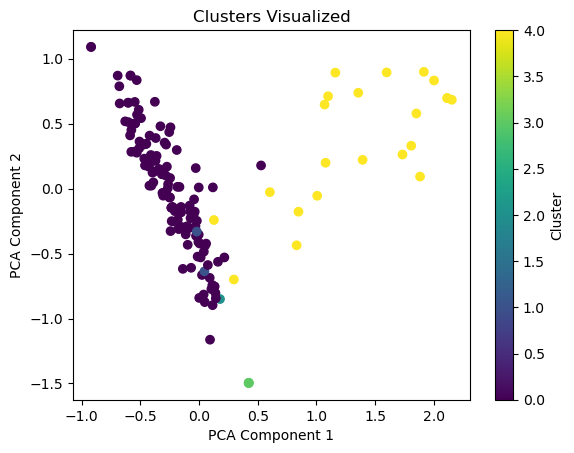

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(similarity_matrix)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Clusters Visualized')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [85]:
# Check if lengths match
len(clusters) == len(tokenized_df)


True

In [86]:
# Add clusters as a new column
tokenized_df['Cluster'] = clusters


In [87]:
print(tokenized_df.head())

                                         Description  \
0  agoraphobia mental behavioral disorder specifi...   
1  generalize anxiety disorder gad mental behavio...   
2  panic disorder mental behavioral disorder spec...   
3  selective mutism anxiety disorder otherwise ca...   
4  separation anxiety disorder sad anxiety disord...   

                                            Symptoms  \
0  [agoraphobia, mental, behavioral, disorder, sp...   
1  [generalize, anxiety, disorder, gad, mental, b...   
2  [panic, disorder, mental, behavioral, disorder...   
3  [besides, lack, speech, common, behavior, char...   
4  [separation, anxiety, disorder, sad, anxiety, ...   

                                              Causes  \
0  [agoraphobia, believe, combination, genetic, e...   
1  [gad, believe, hereditary, genetic, basis, fir...   
2  [cause, panic, disorder, unknown, panic, disor...   
3  [selective, mutism, anxiety, disorder, otherwi...   
4  [sad, cause, significant, negative, effect,

In [88]:
grouped_clusters = tokenized_df.groupby('Cluster')
for cluster, group in grouped_clusters:
    print(f"Cluster {cluster}:")
    print(group)


Cluster 0:
                                           Description  \
0    agoraphobia mental behavioral disorder specifi...   
1    generalize anxiety disorder gad mental behavio...   
2    panic disorder mental behavioral disorder spec...   
3    selective mutism anxiety disorder otherwise ca...   
4    separation anxiety disorder sad anxiety disord...   
..                                                 ...   
151  paranoid personality disorder ppd mental disor...   
152  schizoid personality disorder abbreviate szpd ...   
153  schizotypal personality disorder stpd spd also...   
154  gender dysphoria distress experience mismatch ...   
155  catatonia complex syndrome commonly see people...   

                                              Symptoms  \
0    [agoraphobia, mental, behavioral, disorder, sp...   
1    [generalize, anxiety, disorder, gad, mental, b...   
2    [panic, disorder, mental, behavioral, disorder...   
3    [besides, lack, speech, common, behavior, char...   
4 

In [89]:
# Filter for a specific cluster (e.g., Cluster 0)
cluster_0_data = tokenized_df[tokenized_df['Cluster'] == 0]
print(cluster_0_data)


                                           Description  \
0    agoraphobia mental behavioral disorder specifi...   
1    generalize anxiety disorder gad mental behavio...   
2    panic disorder mental behavioral disorder spec...   
3    selective mutism anxiety disorder otherwise ca...   
4    separation anxiety disorder sad anxiety disord...   
..                                                 ...   
151  paranoid personality disorder ppd mental disor...   
152  schizoid personality disorder abbreviate szpd ...   
153  schizotypal personality disorder stpd spd also...   
154  gender dysphoria distress experience mismatch ...   
155  catatonia complex syndrome commonly see people...   

                                              Symptoms  \
0    [agoraphobia, mental, behavioral, disorder, sp...   
1    [generalize, anxiety, disorder, gad, mental, b...   
2    [panic, disorder, mental, behavioral, disorder...   
3    [besides, lack, speech, common, behavior, char...   
4    [separat

In [90]:
def possible_disorders(disorder, top_n=5):
    similar_disorders = similarity_df.loc[disorder].sort_values(ascending=False)[1:top_n + 1]
    return similar_disorders

print(possible_disorders('Agoraphobia'))


Disorder
Separation anxiety disorder    0.395702
Panic disorder                 0.341715
Social anxiety disorder        0.341693
Trichotillomania               0.334638
Major depressive disorder      0.323930
Name: Agoraphobia, dtype: float64


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Example: Create a similarity matrix from your data
similarity_matrix = cosine_similarity(tfidf_df)  # Replace 'data' with your feature matrix


In [92]:
### Clustered Heatmap with Dendrogram

C:\Users\supre\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\supre\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


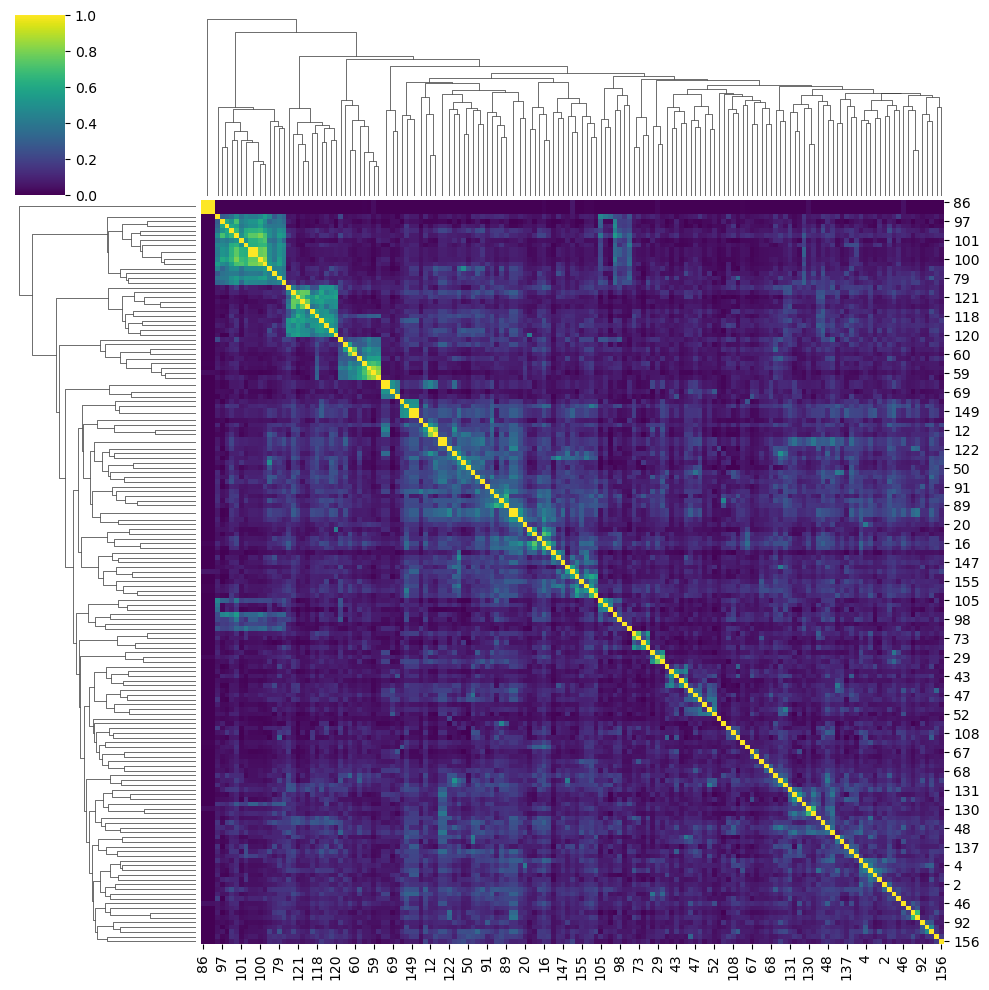

In [93]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Agglomerative clustering
cluster_model = AgglomerativeClustering(metric='precomputed', linkage='average', n_clusters=5)
clusters = cluster_model.fit_predict(1 - similarity_matrix)  # Use (1 - similarity) as distance

# Add clusters to your DataFrame

# Add clusters to your DataFrame
similarity_df['Cluster'] = clusters

# Visualize clusters
sns.clustermap(similarity_matrix, metric="euclidean", cmap="viridis")
plt.show()


In [94]:
#### Cosine Similarity Matrix Heatmap

In [97]:
labels = [f'Item {i+1}' for i in range(157)]  # Replace 158 with the actual size of your matrix
similarity_df = pd.DataFrame(similarity_matrix, index=labels, columns=labels)


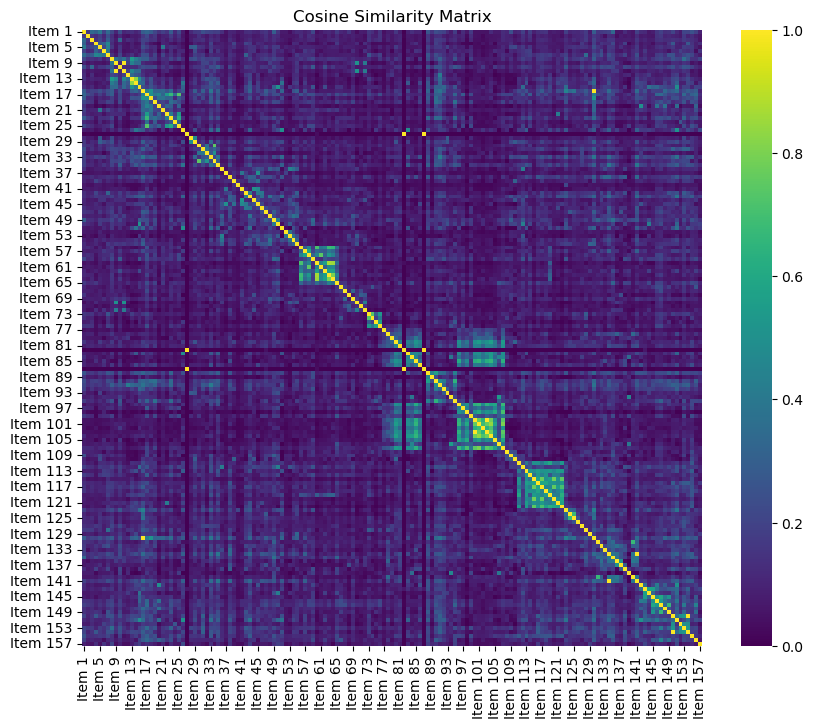

In [98]:


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap='viridis', annot=False)
plt.title("Cosine Similarity Matrix")
plt.show()


# Loading the "User_Query" Data

In [47]:
user_df = pd.read_csv("combined_disorders_dataset.csv")

In [48]:
user_df.head()

Disorder                                         User Query
0  Anorexia nervosa  I’ve started skipping breakfast because it fee...
1  Anorexia nervosa  I can’t stop weighing myself. Every time I ste...
2  Anorexia nervosa  I’ve been cutting my meals into tiny pieces, h...
3  Anorexia nervosa  I feel like my body is never good enough. Even...
4  Anorexia nervosa  Every time I eat, I feel this overwhelming gui...

In [49]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disorder    967 non-null    object
 1   User Query  967 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [50]:
user_df.isnull().sum()

Disorder      0
User Query    0
dtype: int64

In [109]:

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean, tokenize, and lemmatize text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords 
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tag(tokens)]
    
     # removing word "ive" 
    tokens = [word for word in tokens if word not in ('ive', 'feel')]


    
    return tokens


In [110]:
# Apply preprocessing to the "User Query" column
user_df['Tokenized Query'] = user_df['User Query'].apply(preprocess_text)


In [111]:
print(user_df['Tokenized Query'])

0      [start, skip, breakfast, like, small, way, tak...
1      [cant, stop, weigh, every, time, step, scale, ...
2      [cutting, meal, tiny, piece, hop, make, eat, l...
3      [like, body, never, good, enough, even, people...
4      [every, time, eat, overwhelming, guilt, like, ...
                             ...                        
962    [wake, feeling, like, hold, breath, night, mor...
963    [sleep, constantly, interrupt, wake, choke, se...
964    [wake, multiple, time, night, like, im, suffoc...
965    [like, havent, restful, night, sleep, year, mo...
966    [wake, gasp, air, heart, race, running, mornin...
Name: Tokenized Query, Length: 967, dtype: object


In [112]:
user_df

Disorder                                         User Query  \
0    Anorexia nervosa  I’ve started skipping breakfast because it fee...   
1    Anorexia nervosa  I can’t stop weighing myself. Every time I ste...   
2    Anorexia nervosa  I’ve been cutting my meals into tiny pieces, h...   
3    Anorexia nervosa  I feel like my body is never good enough. Even...   
4    Anorexia nervosa  Every time I eat, I feel this overwhelming gui...   
..                ...                                                ...   
962       Sleep apnea  "I wake up feeling like I’ve been holding my b...   
963       Sleep apnea  "My sleep is constantly interrupted because I ...   
964       Sleep apnea  "I wake up multiple times a night feeling like...   
965       Sleep apnea  "I feel like I haven’t had a restful night of ...   
966       Sleep apnea  "I wake up gasping for air, my heart racing as...   

                                       Tokenized Query  
0    [start, skip, breakfast, like, small, way, tak...  
1    [cant, stop, weigh, every, time, step, scale, ...  
2    [cutting, meal, tiny, piece, hop, make, eat, l...  
3    [like, body, never, good, enough, even, people...  
4    [every, time, eat, overwhelming, guilt, like, ...  
..                                                 ...  
962  [wake, feeling, like, hold, breath, night, mor...  
963  [sleep, constantly, interrupt, wake, choke, se...  
964  [wake, multiple, time, night, like, im, suffoc...  
965  [like, havent, restful, night, sleep, year, mo...  
966  [wake, gasp, air, heart, race, running, mornin...  

[967 rows x 3 columns]

In [113]:
print(user_df['Disorder'].unique())


['Anorexia nervosa' 'Attention deficit hyperactivity disorder'
 'Autism spectrum' 'Binge eating disorder' 'Bulimia nervosa'
 'Delusional disorder' 'Dysthymia' 'Generalized anxiety disorder'
 'obsessive compulsive disorder' 'Panic disorder'
 'Post-traumatic stress disorder' 'Schizophrenia'
 'Social anxiety disorder' 'Borderline personality disorder'
 'Major depressive disorder' 'Sleep apnea']


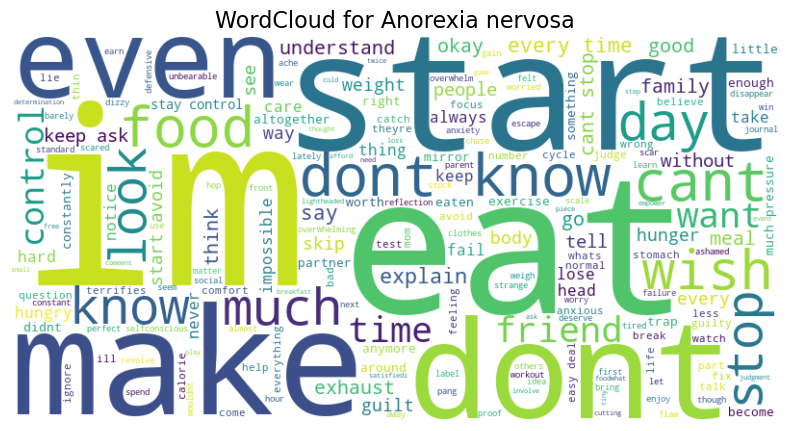

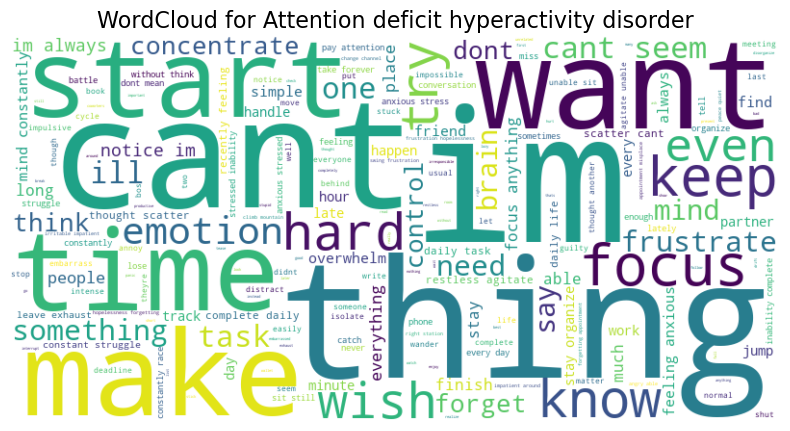

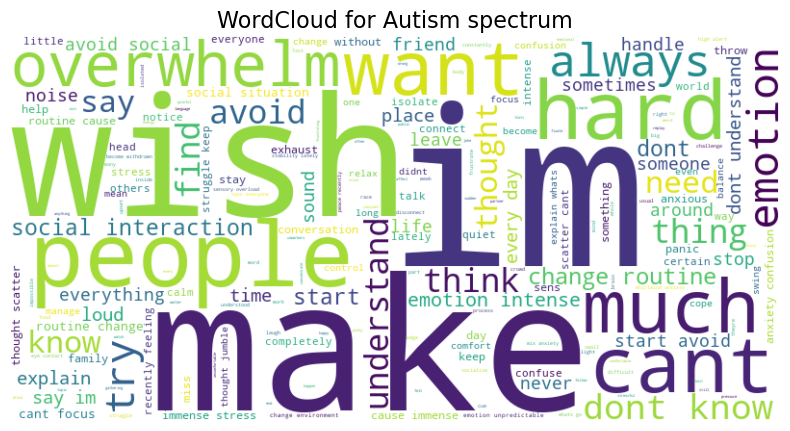

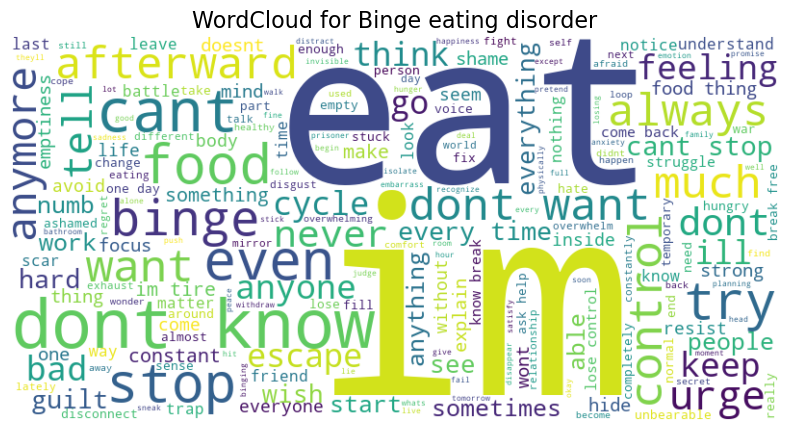

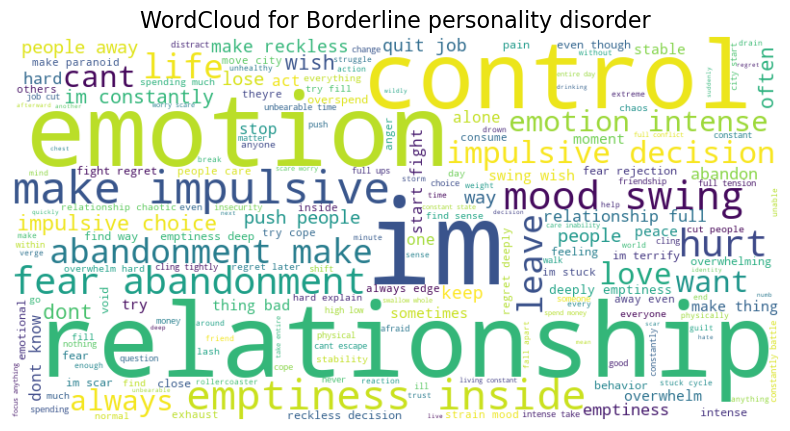

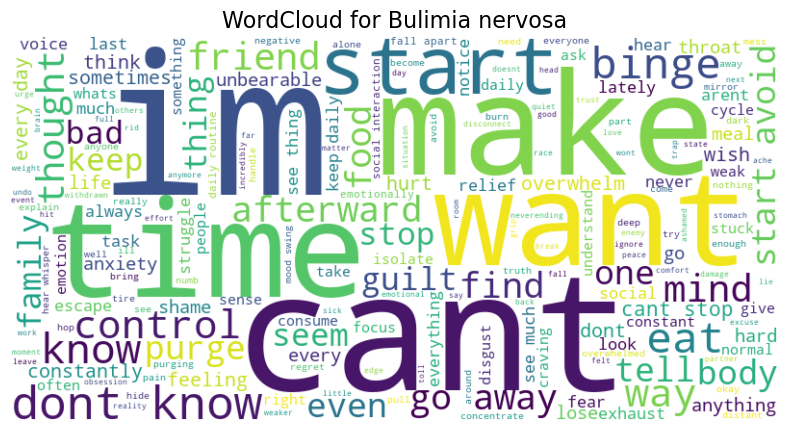

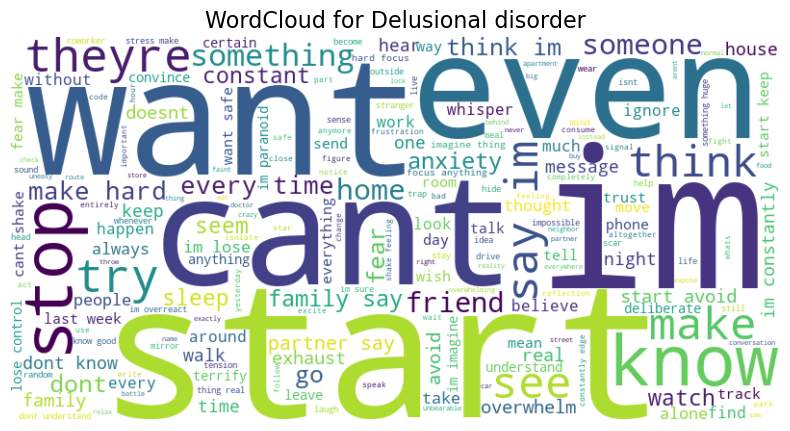

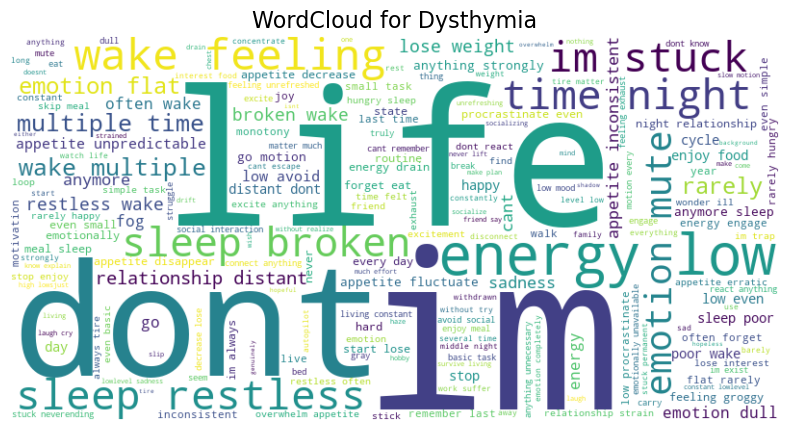

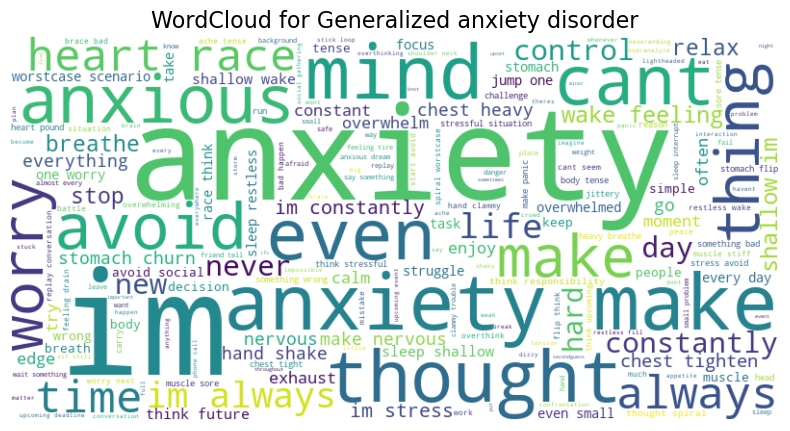

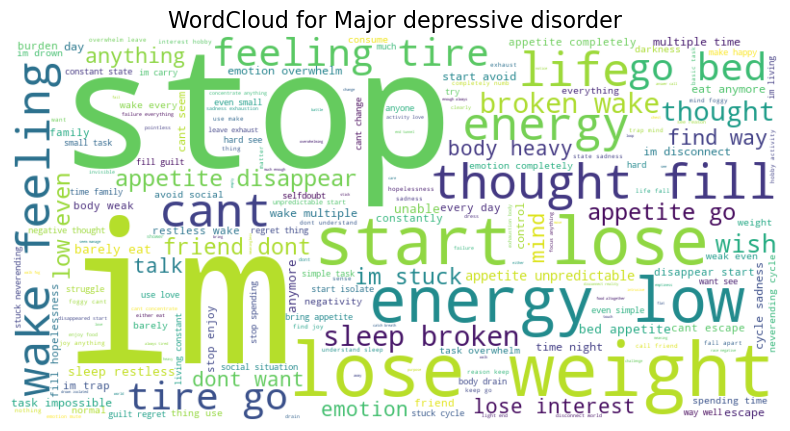

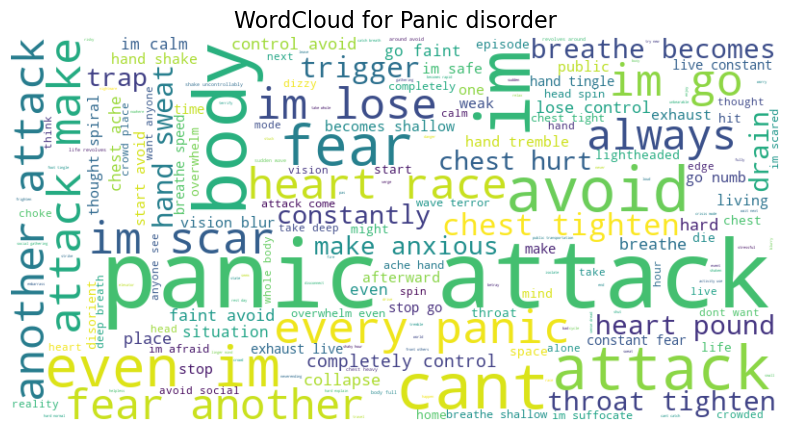

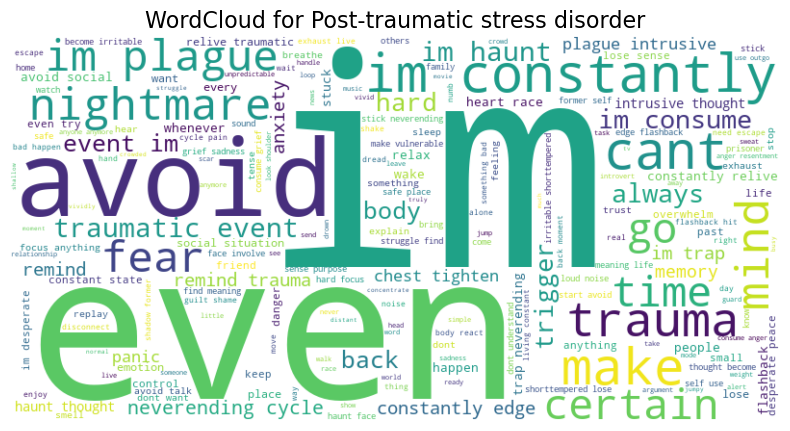

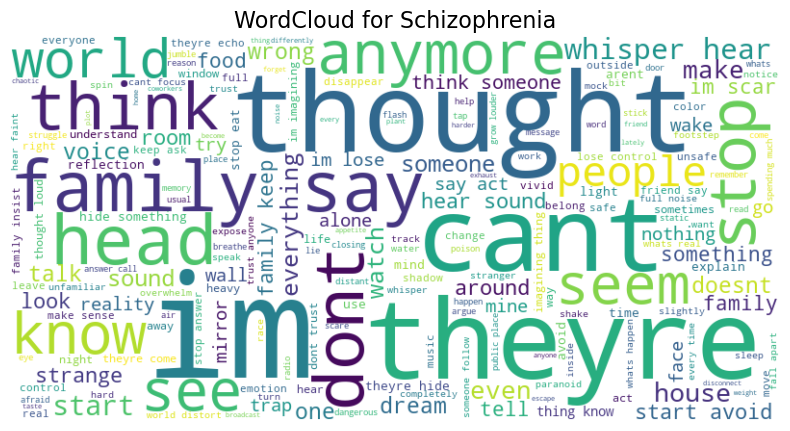

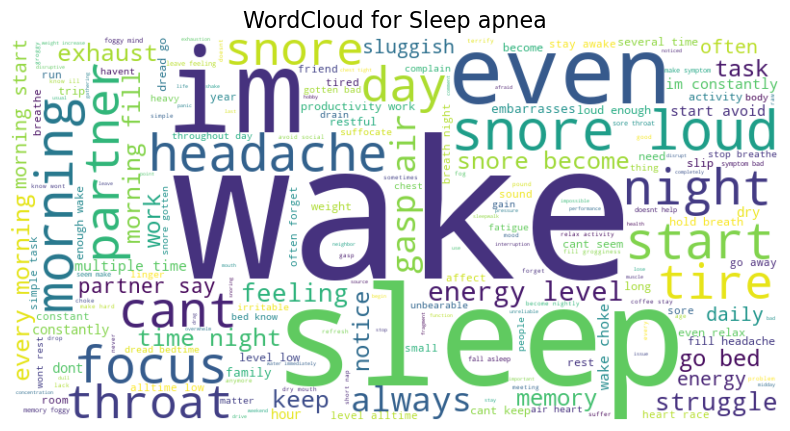

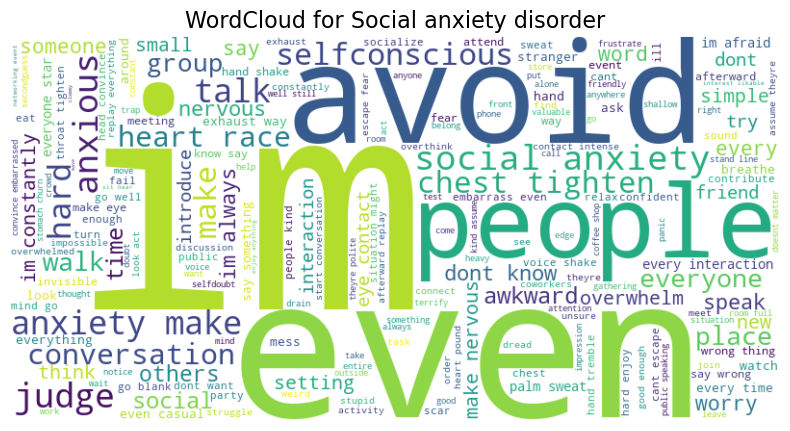

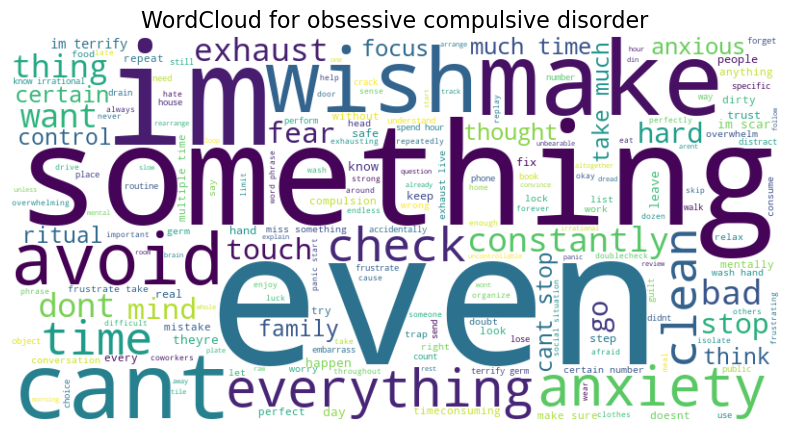

In [114]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure 'Tokenized Query' column contains strings
user_df['Tokenized Query'] = user_df['Tokenized Query'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Grouping the data by 'Disorder'
grouped_data = user_df.groupby('Disorder')['Tokenized Query'].apply(lambda x: ' '.join(x)).reset_index()

# Creating and displaying WordClouds for each disorder
for index, row in grouped_data.iterrows():
    disorder = row['Disorder']
    text = row['Tokenized Query']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {disorder}', fontsize=16)
    plt.show()


In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Transform the target labels
y_encoded = label_encoder.fit_transform(user_df['Disorder'])


#### Vectorize the Tokenized Queries

In [56]:
vectorizer = TfidfVectorizer()

In [57]:
from sklearn.model_selection import train_test_split

# Stratify the split based on the target variable y_encoded
X_train, X_test, y_train, y_test = train_test_split(
    user_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    tokenizer=lambda x: x,  # Use the tokens directly
    preprocessor=lambda x: x,  # Skip additional preprocessing
    token_pattern=None  # Disable the default token pattern
)

# Transform the tokenized queriesuser_df
X_vectorized_train = vectorizer.fit_transform(X_train['Tokenized Query'])


In [59]:
print(type(X_vectorized_train))


<class 'scipy.sparse._csr.csr_matrix'>


In [60]:
X_vectorized_test = vectorizer.transform(X_test['Tokenized Query'])


In [61]:
# Ensure the same number of features
print("Train features:", X_vectorized_train.shape[1])
print("Test features:", X_vectorized_test.shape[1])

Train features: 2024
Test features: 2024


In [62]:
# Convert to DataFrame
X_vectorized_test_df = pd.DataFrame(
    X_vectorized_test.toarray(),  # Convert sparse matrix to dense array
    columns=vectorizer.get_feature_names_out()  # Get feature names from the vectorizer
)

# Show the DataFrame
print(X_vectorized_test_df.head())

   abandon  abandoned  abandonment  ability  able  absolutely  access  \
0      0.0        0.0          0.0      0.0   0.0         0.0     0.0   
1      0.0        0.0          0.0      0.0   0.0         0.0     0.0   
2      0.0        0.0          0.0      0.0   0.0         0.0     0.0   
3      0.0        0.0          0.0      0.0   0.0         0.0     0.0   
4      0.0        0.0          0.0      0.0   0.0         0.0     0.0   

   accident  accidentally  accomplishment  ...  would  wouldnt  wrapper  \
0       0.0           0.0             0.0  ...    0.0      0.0      0.0   
1       0.0           0.0             0.0  ...    0.0      0.0      0.0   
2       0.0           0.0             0.0  ...    0.0      0.0      0.0   
3       0.0           0.0             0.0  ...    0.0      0.0      0.0   
4       0.0           0.0             0.0  ...    0.0      0.0      0.0   

      write  wrong  year  yell  yesterday  yet  zone  
0  0.000000    0.0   0.0   0.0        0.0  0.0   0.0  


In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the classifier
clf = LogisticRegression()
clf.fit(X_vectorized_train, y_train)


LogisticRegression()

In [64]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = clf.predict(X_vectorized_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                                          precision    recall  f1-score   support

                        Anorexia nervosa       1.00      0.17      0.29         6
Attention deficit hyperactivity disorder       1.00      0.67      0.80         9
                         Autism spectrum       0.86      0.60      0.71        10
                   Binge eating disorder       0.67      1.00      0.80        10
         Borderline personality disorder       1.00      1.00      1.00        12
                         Bulimia nervosa       1.00      0.57      0.73         7
                     Delusional disorder       0.77      0.83      0.80        12
                               Dysthymia       0.93      1.00      0.97        14
            Generalized anxiety disorder       0.93      1.00      0.97        14
               Major depressive disorder       1.00      0.93      0.96        14
                          Panic disorder       1.00      1.00      1.00        14
          Post-

In [65]:

# Testing different max_features values
for max_features in [500, 1000, 2000]:
    vectorizer = TfidfVectorizer(
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        token_pattern=None,
        max_features=max_features
    )
    
    
    X_train_vec = vectorizer.fit_transform(X_train['Tokenized Query'])
    X_test_vec = vectorizer.transform(X_test['Tokenized Query'])
    
    # Training classifier
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_vec, y_train)
    

    y_pred = clf.predict(X_test_vec)
    print(f"Performance with max_features={max_features}:")
    print(classification_report(y_test, y_pred))


Performance with max_features=500:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.83      0.56      0.67         9
           2       1.00      0.80      0.89        10
           3       0.56      1.00      0.71        10
           4       1.00      1.00      1.00        12
           5       1.00      0.57      0.73         7
           6       0.91      0.83      0.87        12
           7       0.93      1.00      0.97        14
           8       1.00      1.00      1.00        14
           9       1.00      0.93      0.96        14
          10       1.00      1.00      1.00        14
          11       0.89      0.94      0.92        18
          12       0.88      1.00      0.93        14
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        14
          15       0.65      0.79      0.71        14

    accuracy                           0.89  

In [66]:

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(X_vectorized_train)

print("Top words per topic:")
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Top words per topic:
Topic 0:  ['grade', 'mean', 'struggle', 'avoid', 'everyday', 'doublechecking', 'cant', 'impossible', 'livesone', 'fidget']
Topic 1:  ['incredibly', 'photos', 'felt', 'repetitive', 'constantly', 'end', 'mean', 'livesone', 'fidget', 'impossible']
Topic 2:  ['detach', 'dirty', 'confused', 'difficult', 'locked', 'focused', 'sleep', 'intentional', 'glance', 'restaurant']
Topic 3:  ['shadow', 'scrutinize', 'photos', 'terrifies', 'avoid', 'everyday', 'mean', 'livesone', 'impossible', 'fidget']
Topic 4:  ['generaltheyre', 'peopleone', 'fidget', 'hello', 'notebook', 'mail', 'solid', 'weaker', 'source', 'mushy']


In [67]:


# Function to augment text by replacing words with synonyms
def augment_text(text):
    words = text.split()
    augmented_text = []
    
    for word in words:
        # 10% chance to replace a word with a synonym
        if random.random() < 0.1:
            synonyms = wordnet.synsets(word)
            if synonyms:
                synonym = random.choice(synonyms).lemmas()[0].name()
                augmented_text.append(synonym.replace('_', ' '))
            else:
                augmented_text.append(word)
        else:
            augmented_text.append(word)
    
    return ' '.join(augmented_text)

# Apply augmentation
augmented_queries = user_df['User Query'].apply(augment_text)
augmented_df = pd.DataFrame({'User Query': augmented_queries, 'Disorder': user_df['Disorder']})

# Combine original and augmented data
combined_df = pd.concat([user_df, augmented_df]).reset_index(drop=True)

# Train-test split
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    combined_df['User Query'], combined_df['Disorder'], test_size=0.2, random_state=42, stratify=combined_df['Disorder']
)

# Vectorize using TF-IDF
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x, token_pattern=None)
X_train_aug_tfidf = tfidf.fit_transform(X_train_aug)
X_test_aug_tfidf = tfidf.transform(X_test_aug)

# Train Logistic Regression model
log_reg_model_aug = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model_aug.fit(X_train_aug_tfidf, y_train_aug)

# Predict and evaluate
y_pred_aug = log_reg_model_aug.predict(X_test_aug_tfidf)
augmented_accuracy = accuracy_score(y_test_aug, y_pred_aug)
print("Logistic Regression Accuracy after Data Augmentation:", augmented_accuracy)
print(classification_report(y_test_aug, y_pred_aug, target_names=combined_df['Disorder'].unique()))


Logistic Regression Accuracy after Data Augmentation: 0.9844961240310077
                                          precision    recall  f1-score   support

                        Anorexia nervosa       1.00      0.83      0.91        12
Attention deficit hyperactivity disorder       1.00      0.89      0.94        18
                         Autism spectrum       1.00      1.00      1.00        19
                   Binge eating disorder       0.80      1.00      0.89        20
                         Bulimia nervosa       1.00      1.00      1.00        24
                     Delusional disorder       1.00      0.93      0.96        14
                               Dysthymia       1.00      1.00      1.00        24
            Generalized anxiety disorder       0.97      1.00      0.98        28
           obsessive compulsive disorder       1.00      1.00      1.00        28
                          Panic disorder       1.00      0.96      0.98        28
          Post-traumatic

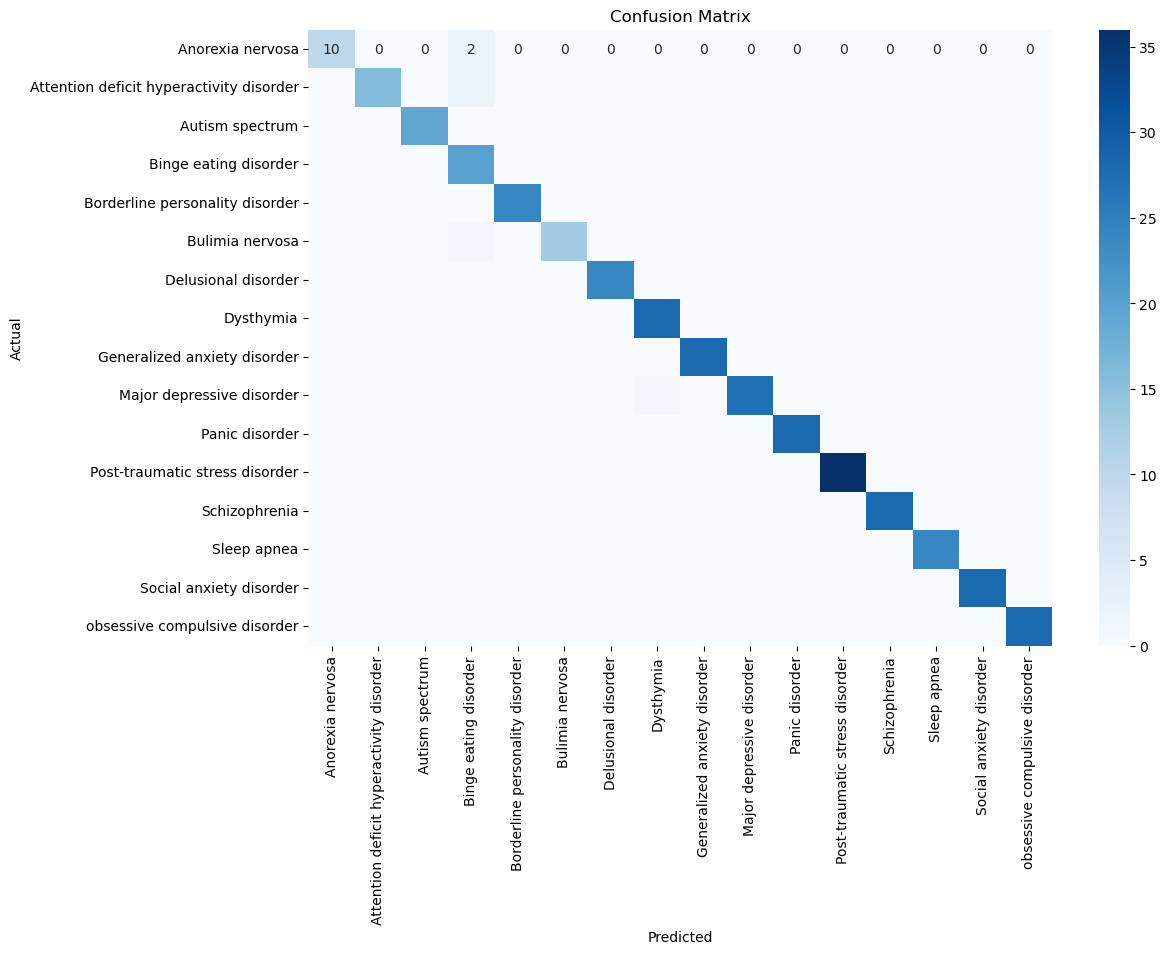

In [68]:
# Generate predictions
y_pred_aug = log_reg_model_aug.predict(X_test_aug_tfidf)

# Create confusion matrix
cm = confusion_matrix(y_test_aug, y_pred_aug)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [70]:
def get_top_similar_disorders(predicted_disorder, similarity_df, top_n=3):
    """
    Fetch the top N similar disorders for a given disorder.
    
    Args:
        predicted_disorder (str): The disorder predicted by the model.
        similarity_df (pd.DataFrame): Cosine similarity matrix of disorders.
        top_n (int): Number of top similar disorders to return.
    
    Returns:
        pd.Series: Top N similar disorders with similarity scores.
    """
    if predicted_disorder not in similarity_df.index:
        raise ValueError(f"Disorder '{predicted_disorder}' not found in similarity data.")
    
    # Get the similarity scores for the disorder and sort in descending order
    similar_disorders = similarity_df.loc[predicted_disorder].sort_values(ascending=False)
    
    # Exclude the disorder itself (cosine similarity = 1.0) and get top 3
    return similar_disorders.iloc[1:top_n+1]


In [71]:
# Example user query prediction
user_query = "I constantly feel the need to check my weight and exercise excessively, even when I’m exhausted."
predicted_disorder = log_reg_model_aug.predict(tfidf.transform([user_query]))[0]

# Get top similar disorders
top_similar_disorders = get_top_similar_disorders(predicted_disorder, similarity_df)

print(f"Predicted Disorder: {predicted_disorder}")
print("Top Similar Disorders:")
print(top_similar_disorders)

Predicted Disorder: Post-traumatic stress disorder
Top Similar Disorders:
Disorder
Complex post-traumatic stress disorder    0.747561
Acute stress disorder                     0.376896
Major depressive disorder                 0.233639
Name: Post-traumatic stress disorder, dtype: float64
